___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [311]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.")

You can safely ignore this.


In [312]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import tensorflow as tf

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [314]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
seed = 42
keras.utils.set_random_seed(seed)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

In [315]:
# Get python version
!python --version

Python 3.10.12


In [316]:
# Get tensorflow version
import tensorflow as tf

tf.__version__

'2.15.0'

In [317]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [318]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

In [319]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [320]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [321]:
df.shape

(10000, 14)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [323]:
df.columns = df.columns.str.lower()

In [324]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rownumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
customerid,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
creditscore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
numofproducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
hascrcard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
isactivemember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
estimatedsalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [325]:
df.describe(include="O")

,surname,geography,gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [326]:
df.duplicated().sum()

0

In [327]:
df.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [328]:
df.drop(columns=["rownumber", "customerid", "surname"], inplace=True)

**EXITED**

In [329]:
df.exited.nunique()

2

In [330]:
df.exited.value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

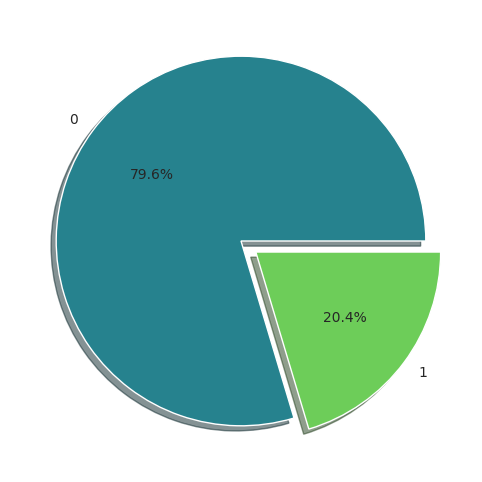

In [331]:
df.exited.value_counts().plot(kind="pie", shadow=True, explode=(0,0.1), autopct='%1.1f%%', colors=["#26828E", "#6DCD59"])
plt.ylabel("")
plt.show()

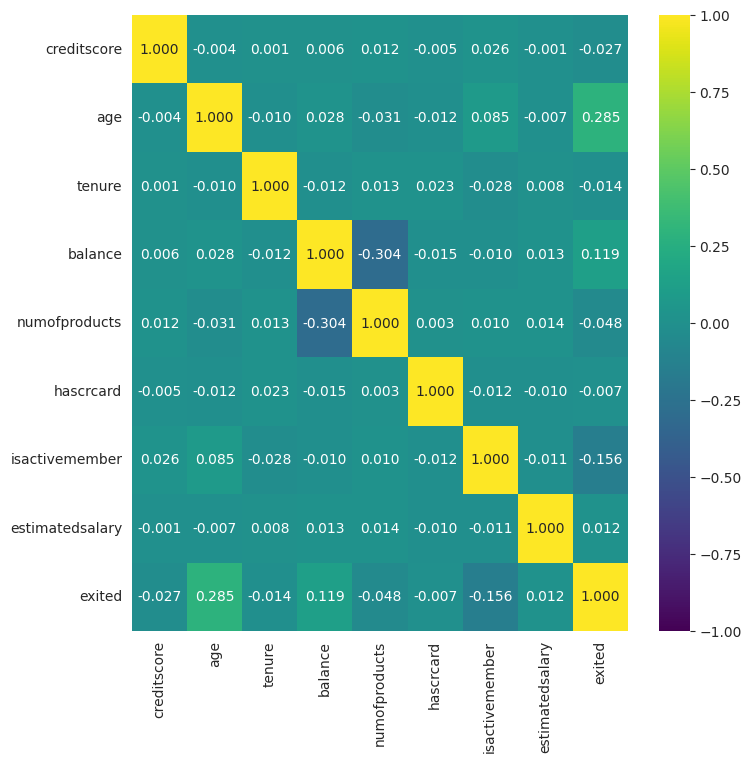

In [332]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".3f", cmap="viridis")
plt.show()

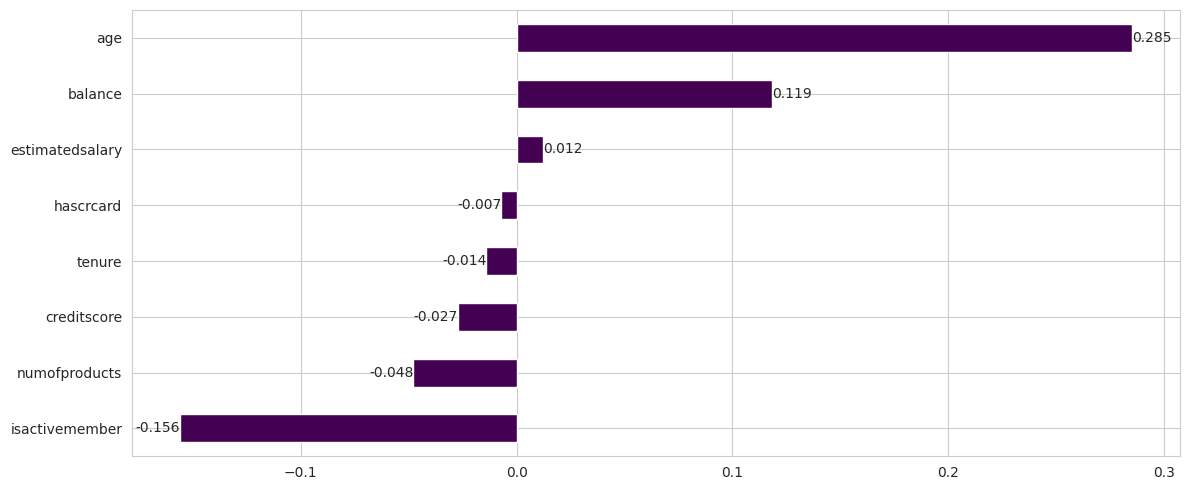

In [333]:
plt.figure(figsize=(12,5))
ax = df.corr(numeric_only=True)["exited"].sort_values().drop("exited").plot(kind="barh", cmap="viridis")
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.tight_layout()
plt.show()                # low correlation values between label and features

**AGE**

In [334]:
df.age.nunique()

70

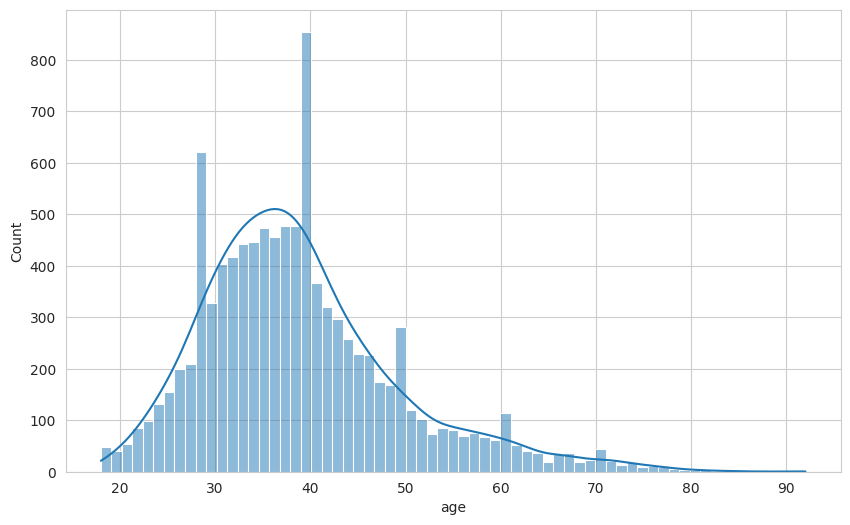

In [335]:
sns.histplot(data=df, x="age", kde=True)
plt.show()

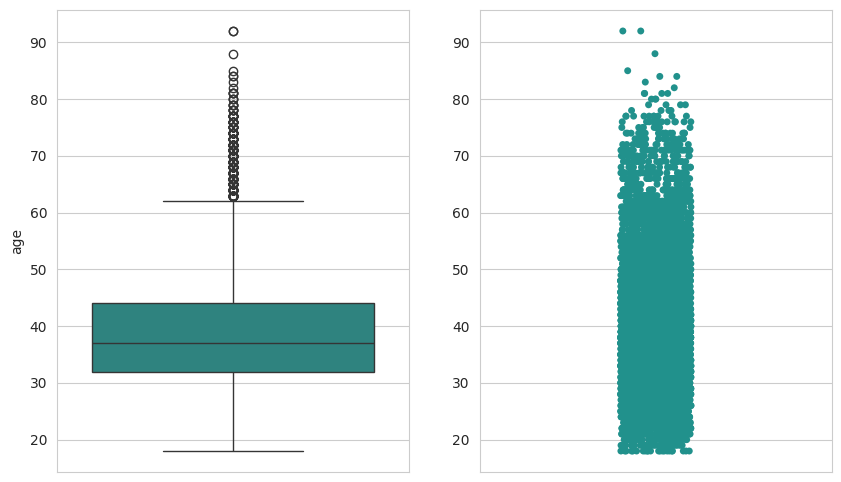

In [336]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(df.age, palette="viridis")

plt.subplot(1,2,2)
sns.stripplot(df.age, palette="viridis")
plt.ylabel("")
plt.show()

In [337]:
df.groupby("gender")["age"].mean()

gender
Female   39.238
Male     38.658
Name: age, dtype: float64

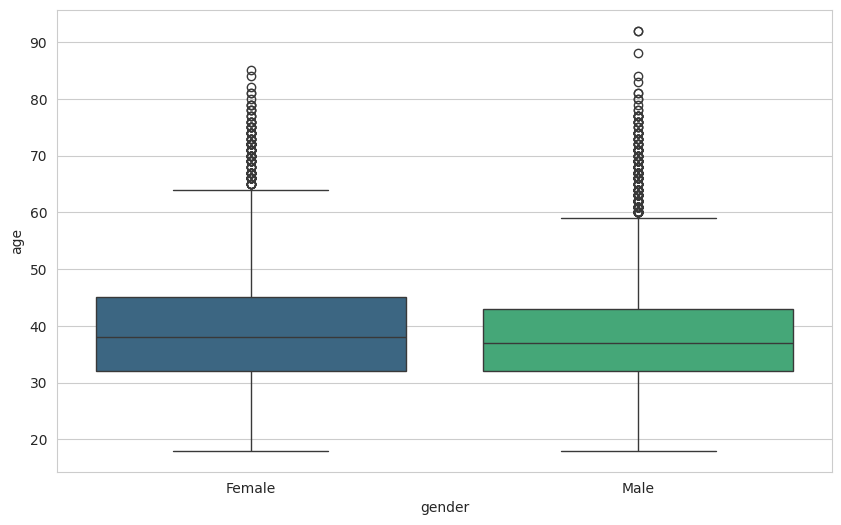

In [338]:
sns.boxplot(data=df, y="age", x="gender", palette="viridis")
plt.show()

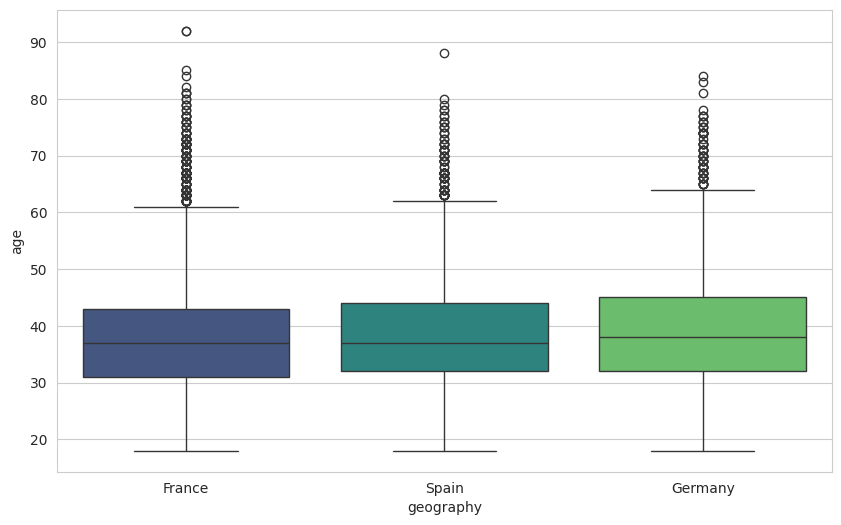

In [339]:
sns.boxplot(data=df, y="age", x="geography", palette="viridis")
plt.show()

**ESTIMATED SALARY**

In [340]:
df.estimatedsalary.nunique()

9999

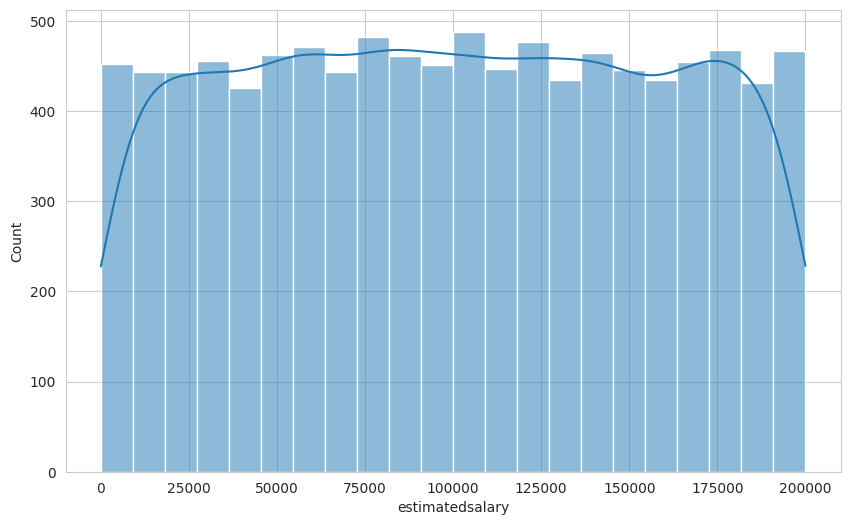

In [341]:
sns.histplot(data=df, x="estimatedsalary", kde=True)
plt.show()

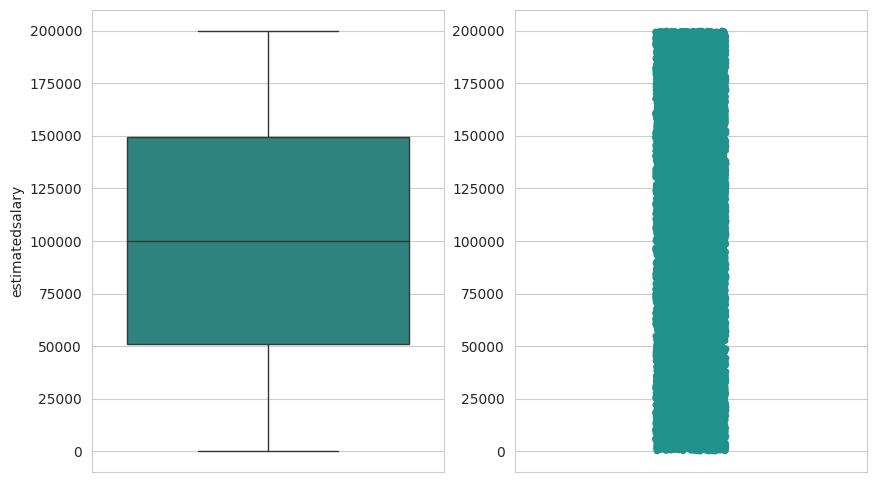

In [342]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(df.estimatedsalary, palette="viridis")

plt.subplot(1,2,2)
sns.stripplot(df.estimatedsalary, palette="viridis")
plt.ylabel("")
plt.show()

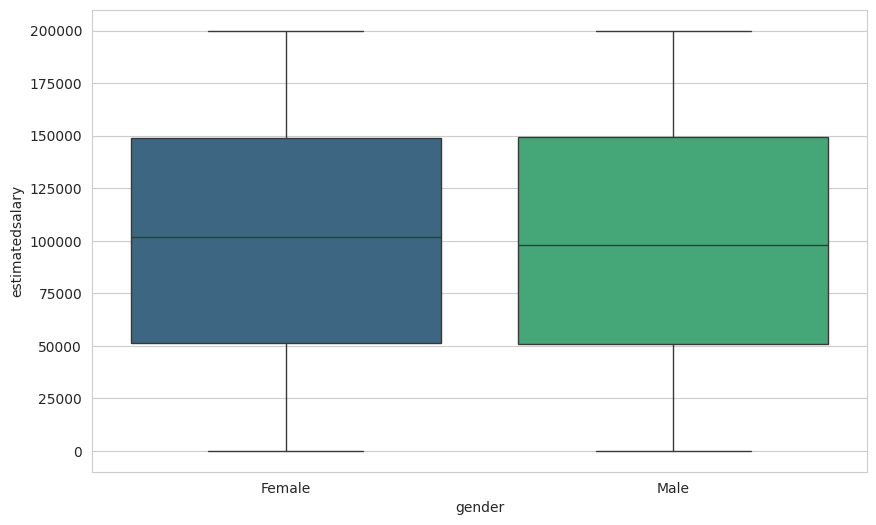

In [343]:
sns.boxplot(data=df, y="estimatedsalary", x="gender", palette="viridis")
plt.show()

**CREDIT SCORE**

In [344]:
df.creditscore.nunique()

460

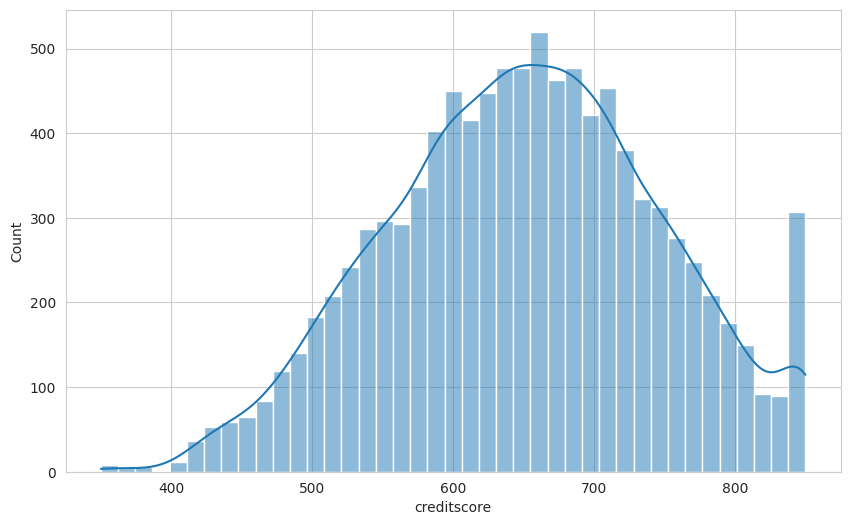

In [345]:
sns.histplot(data=df, x="creditscore", kde=True)
plt.show()

In [346]:
df.creditscore.describe()

count   10000.000
mean      650.529
std        96.653
min       350.000
25%       584.000
50%       652.000
75%       718.000
max       850.000
Name: creditscore, dtype: float64

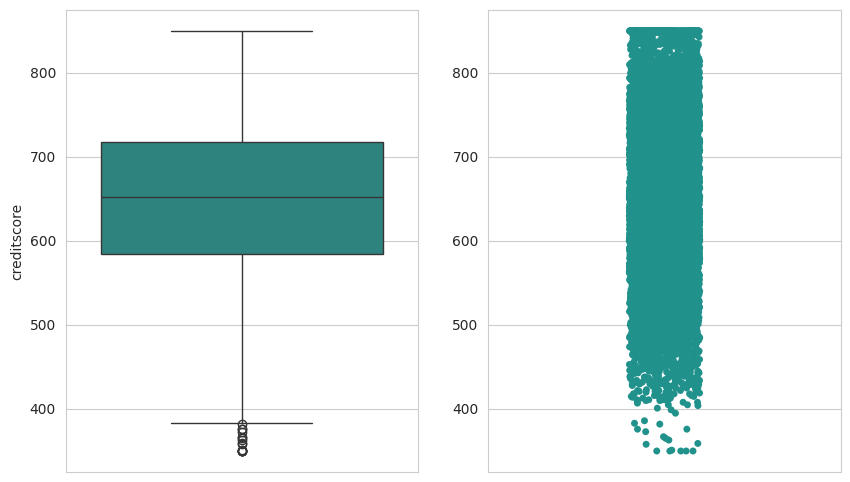

In [347]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(df.creditscore, palette="viridis")

plt.subplot(1,2,2)
sns.stripplot(df.creditscore, palette="viridis")
plt.ylabel("")
plt.show()

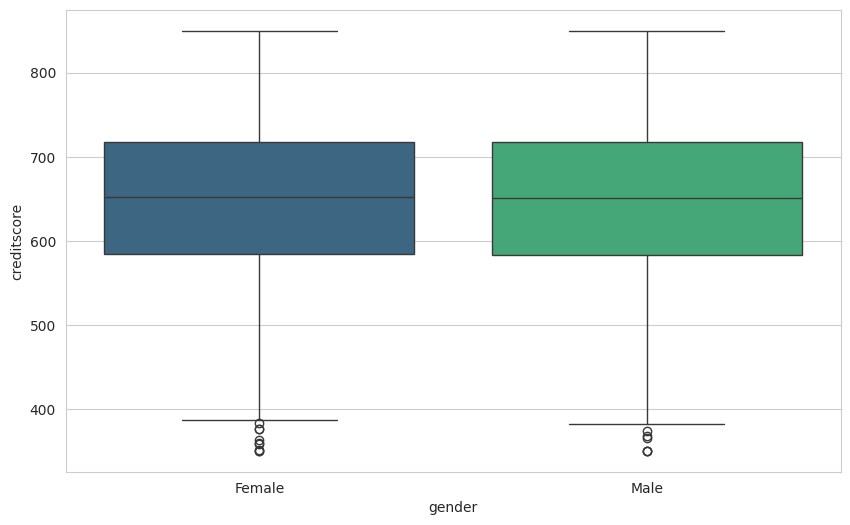

In [348]:
sns.boxplot(data=df, y="creditscore", x="gender", hue="gender", palette="viridis")
plt.show()

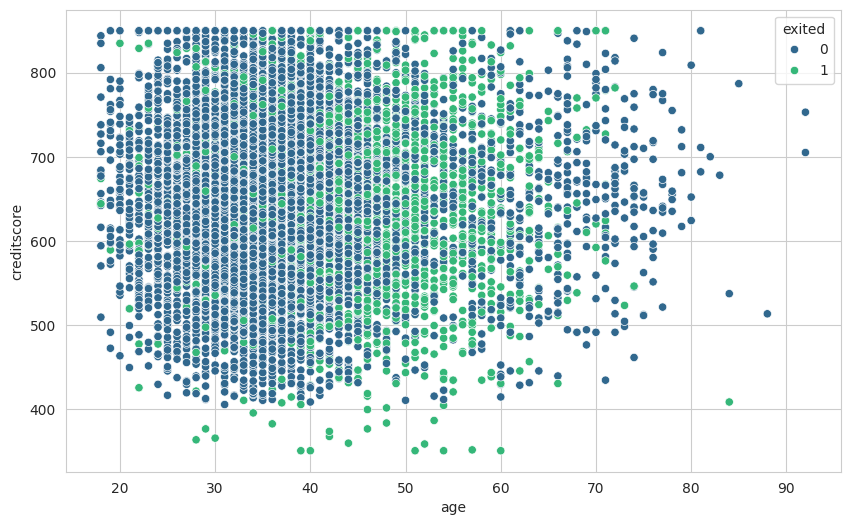

In [349]:
sns.scatterplot(data=df, x="age", y="creditscore", hue="exited", palette="viridis");

**TENURE**

In [350]:
df.tenure.nunique()

11

In [351]:
df.tenure.value_counts().sort_index()

tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: count, dtype: int64

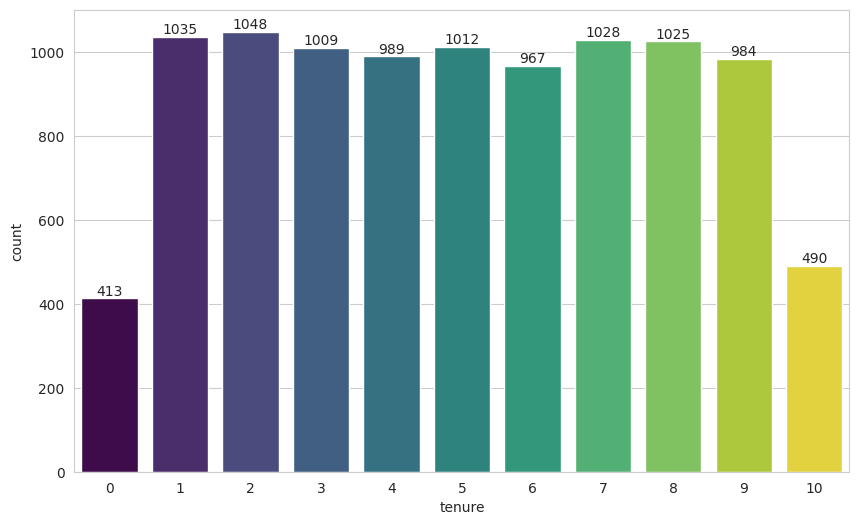

In [352]:
ax = sns.countplot(data=df, x="tenure", hue="tenure", palette="viridis", legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

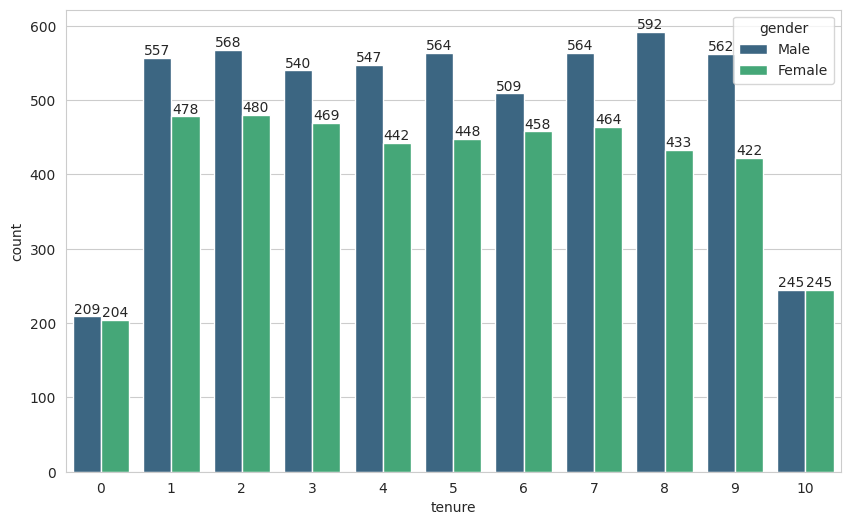

In [353]:
ax = sns.countplot(data=df, x="tenure", hue="gender", palette="viridis")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.show()

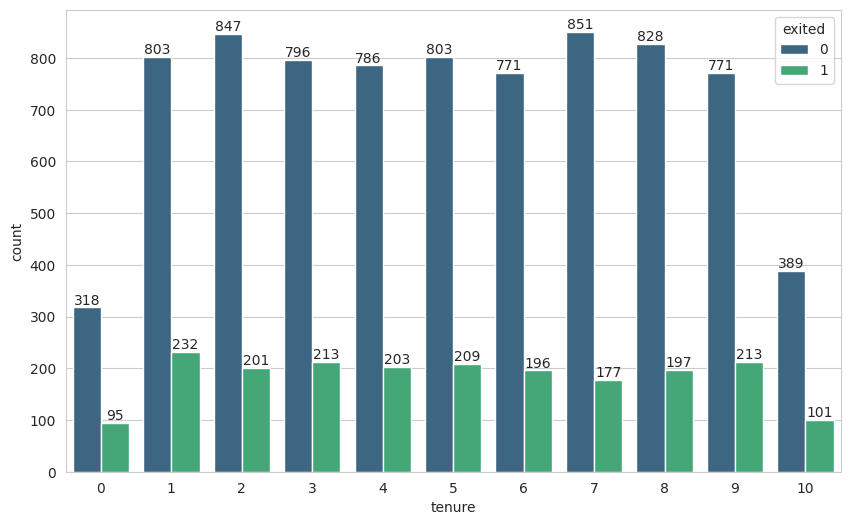

In [354]:
ax = sns.countplot(data=df, x="tenure", hue="exited", palette="viridis")
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.1, count, ha='center', va='bottom')
plt.show()

**BALANCE**

In [355]:
df.balance.nunique()

6382

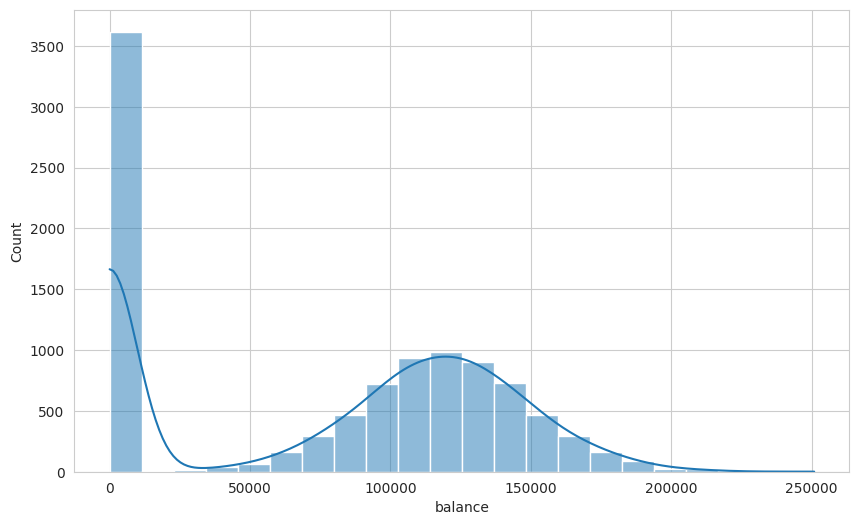

In [356]:
sns.histplot(data=df, x="balance", kde=True)
plt.show()

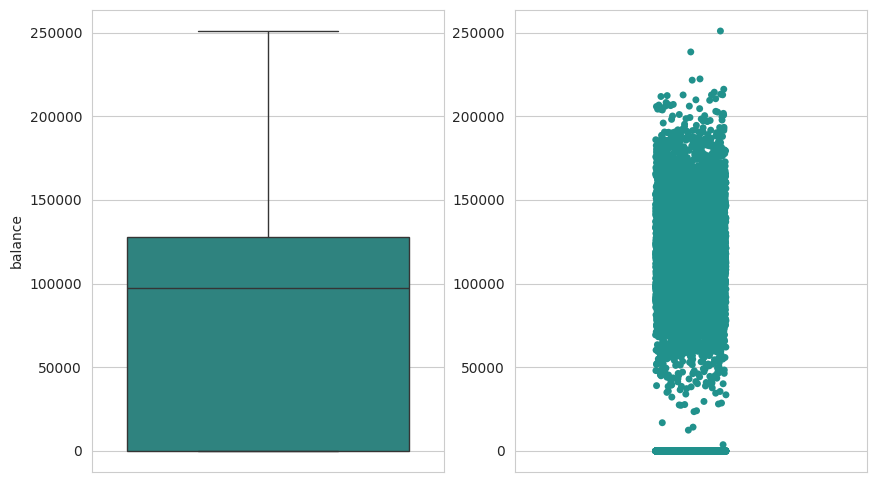

In [357]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(df.balance, palette="viridis")

plt.subplot(1,2,2)
sns.stripplot(df.balance, palette="viridis")
plt.ylabel("")
plt.show()

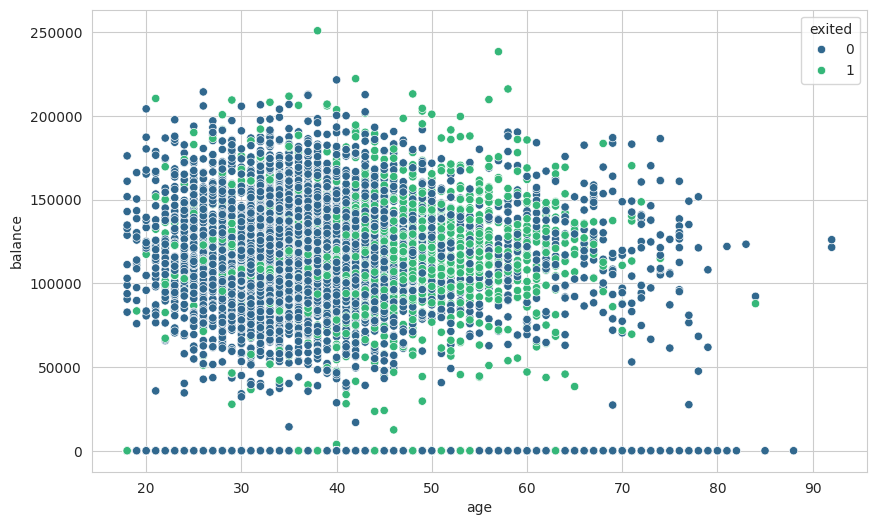

In [358]:
sns.scatterplot(data=df, x="age", y="balance", hue="exited", palette="viridis");

**NUMBER OF PRODUCTS**

In [359]:
df.numofproducts.nunique()

4

In [360]:
df.numofproducts.value_counts()

numofproducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

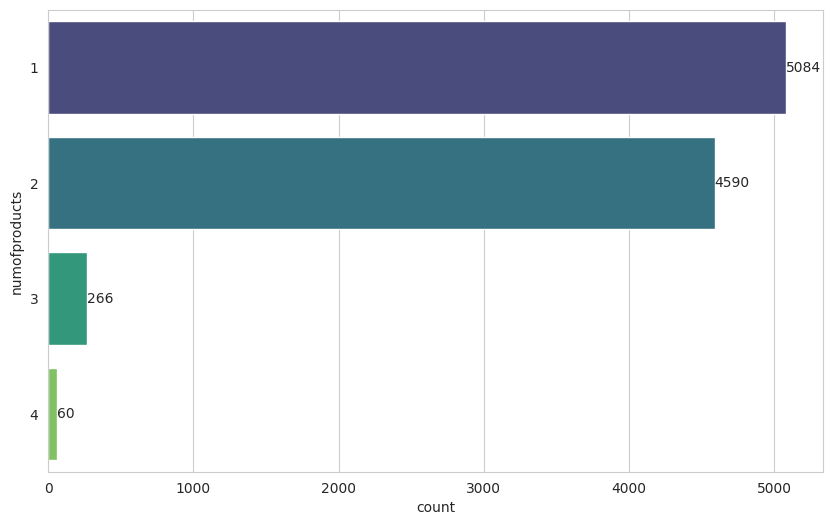

In [361]:
ax = sns.countplot(data=df, y="numofproducts", palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

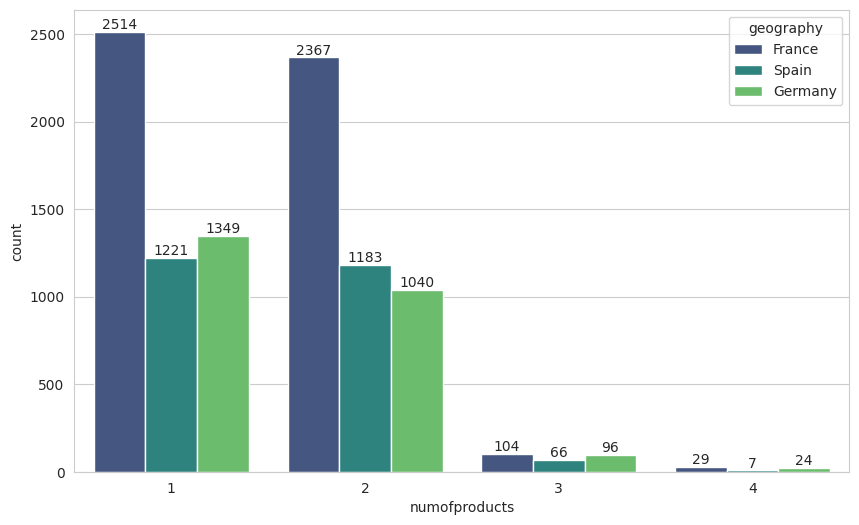

In [362]:
ax = sns.countplot(data=df, x="numofproducts", hue="geography", palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**HASCRCARD**

In [363]:
df.hascrcard.nunique()

2

In [364]:
df.hascrcard.value_counts()

hascrcard
1    7055
0    2945
Name: count, dtype: int64

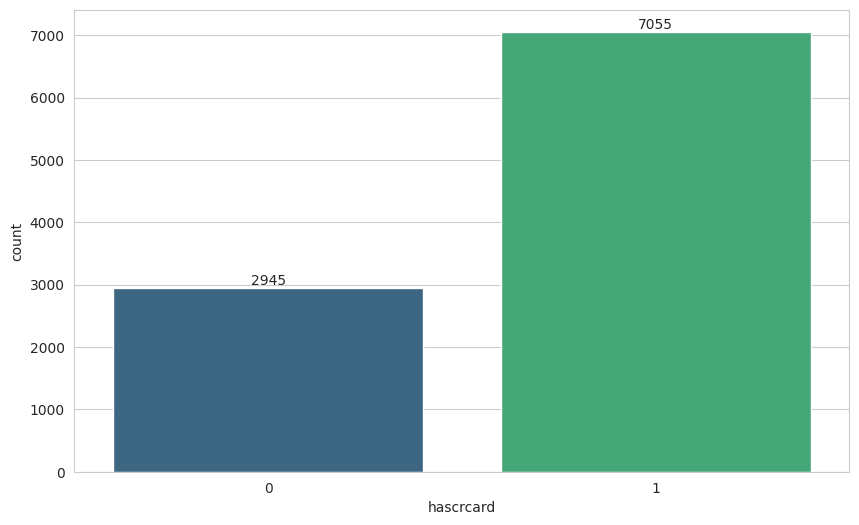

In [365]:
ax = sns.countplot(data=df, x="hascrcard", palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

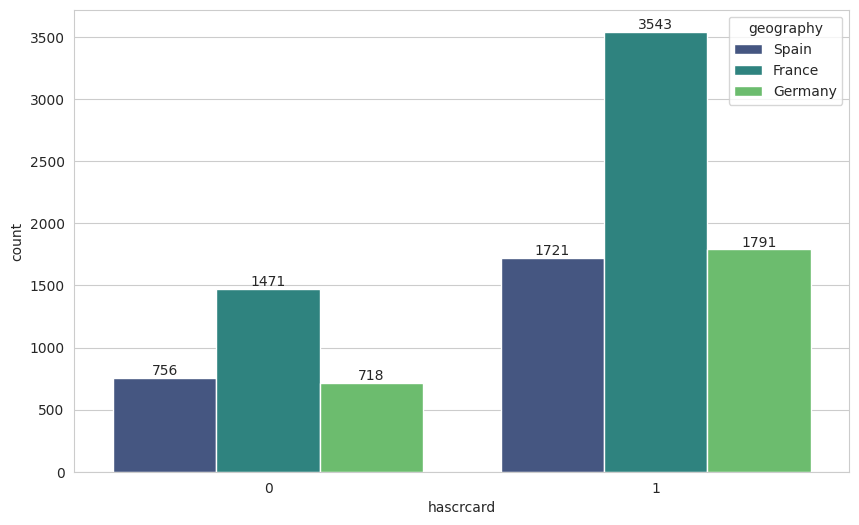

In [366]:
ax = sns.countplot(data=df, x="hascrcard", hue="geography", palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**ISACTIVEMEMBER**

In [367]:
df.isactivemember.nunique()

2

In [368]:
df.isactivemember.value_counts()

isactivemember
1    5151
0    4849
Name: count, dtype: int64

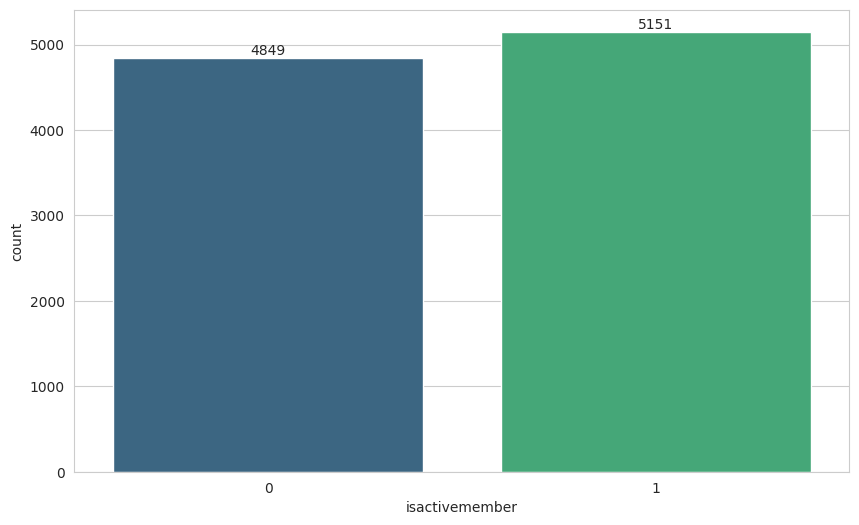

In [369]:
ax = sns.countplot(data=df, x="isactivemember", palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**GEOGRAPHY**

In [370]:
df.geography.nunique()

3

In [371]:
df.geography.value_counts()

geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

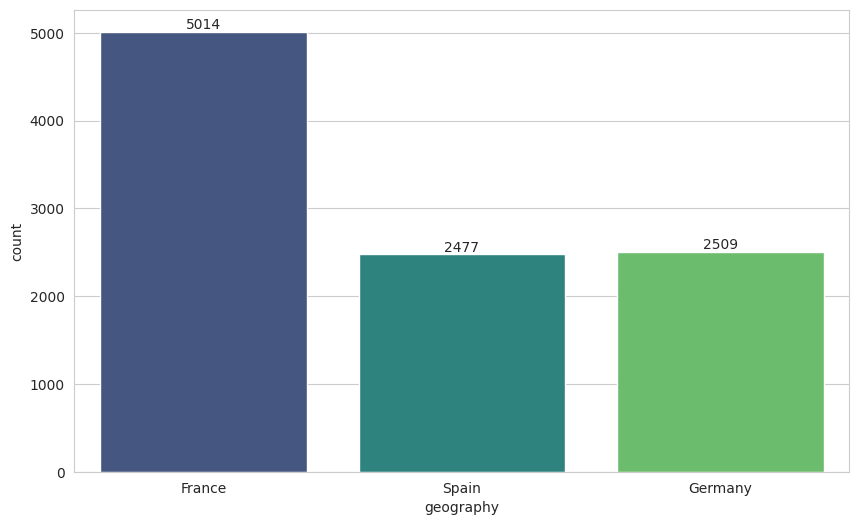

In [372]:
ax = sns.countplot(data=df, x="geography", palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**GENDER**

In [373]:
df.gender.nunique()

2

In [374]:
df.gender.value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

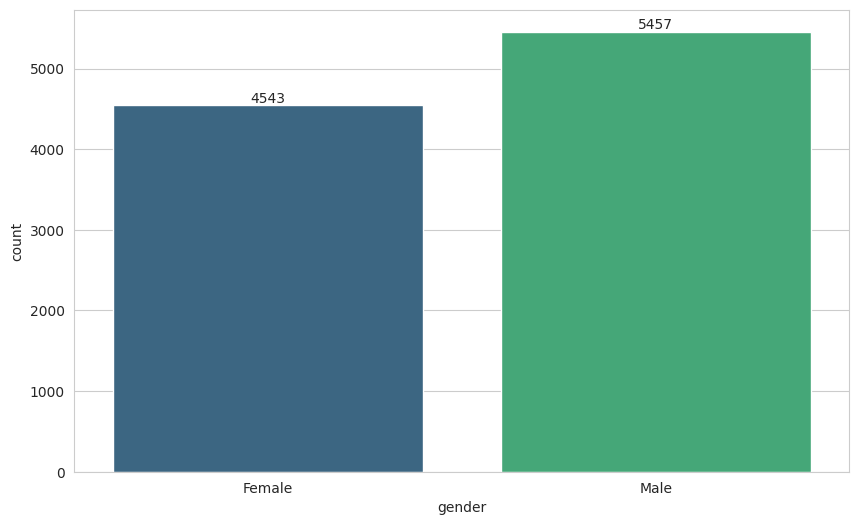

In [375]:
ax = sns.countplot(data=df, x="gender",palette="viridis")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [376]:
X = df.drop("exited", axis=1)
y = df["exited"]

In [377]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=seed)

In [378]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_onehot  = ['geography', 'gender']

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

In [379]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)
X_val_trans = column_trans.transform(X_val)

In [380]:
X_train_trans.head()

,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
6756,1.000,0.000,0.000,1.000,0.000,473,39,9,117103.260,2,1,1,85937.520
8911,0.000,1.000,0.000,0.000,1.000,718,32,9,169947.410,2,1,1,27979.160
5128,1.000,0.000,0.000,1.000,0.000,508,38,3,166328.650,2,0,1,22614.190
1436,0.000,1.000,0.000,0.000,1.000,576,28,1,119336.290,2,0,1,58976.850
2254,1.000,0.000,0.000,0.000,1.000,679,36,6,147733.640,1,0,1,172501.380


In [381]:
X_test_trans.head()

,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
5702,1.000,0.000,0.000,0.000,1.000,585,36,7,0.000,2,1,0,94283.090
3667,0.000,1.000,0.000,0.000,1.000,525,33,4,131023.760,2,0,0,55072.930
1617,0.000,0.000,1.000,1.000,0.000,557,40,4,0.000,2,0,1,105433.530
5673,0.000,0.000,1.000,0.000,1.000,639,34,5,139393.190,2,0,0,33950.080
4272,0.000,0.000,1.000,1.000,0.000,640,34,3,77826.800,1,1,1,168544.850


In [382]:
X_val_trans.head()

,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
9703,0.000,1.000,0.000,1.000,0.000,682,43,7,111094.050,2,1,1,64679.300
4687,1.000,0.000,0.000,0.000,1.000,769,48,2,96542.160,2,0,1,197885.720
8835,0.000,0.000,1.000,0.000,1.000,716,34,9,0.000,1,1,1,66695.710
9883,1.000,0.000,0.000,0.000,1.000,678,41,2,148088.110,1,1,0,14083.120
5449,1.000,0.000,0.000,1.000,0.000,549,46,7,0.000,1,1,1,109057.560


In [383]:
X_train_trans.shape

(7200, 13)

In [384]:
X_test_trans.shape

(2000, 13)

In [385]:
X_val_trans.shape

(800, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [386]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [387]:
X_train_scaled = scaler.fit_transform(X_train_trans)
X_val_scaled = scaler.transform(X_val_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [388]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import RocCurveDisplay,accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer, PrecisionRecallDisplay,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, roc_auc_score, auc

In [389]:
# Initialize a Sequential model
model1 = Sequential()

# Add the input layer with 15 neurons and ReLU activation
# input_dim is set to the number of features in the training data
model1.add(Dense(15, activation="relu", input_dim=X_train_scaled.shape[1]))

# Add the first hidden layer with 10 neurons and ReLU activation
model1.add(Dense(10, activation="relu"))

# Add the second hidden layer with 6 neurons and ReLU activation
model1.add(Dense(6, activation="relu"))

# Add the second hidden layer with 4 neurons and ReLU activation
model1.add(Dense(4, activation="relu"))

# Add the output layer with 1 neuron and sigmoid activation for binary classification
model1.add(Dense(1, activation="sigmoid"))

# Compile the model
# Use Adam optimizer, binary crossentropy loss, and accuracy as the metric
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [390]:
model1.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_198 (Dense)           (None, 15)                210       
                                                                 
 dense_199 (Dense)           (None, 10)                160       
                                                                 
 dense_200 (Dense)           (None, 6)                 66        
                                                                 
 dense_201 (Dense)           (None, 4)                 28        
                                                                 
 dense_202 (Dense)           (None, 1)                 5         
                                                                 
Total params: 469 (1.83 KB)
Trainable params: 469 (1.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [391]:
model1.fit(
    x=X_train_scaled,
    y=y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=500,
    verbose=1
)

Epoch 1/500
225/225 [==============================] - 3s 7ms/step - loss: 0.5449 - recall: 0.0266 - val_loss: 0.4812 - val_recall: 0.0000e+00
Epoch 2/500
225/225 [==============================] - 1s 6ms/step - loss: 0.4710 - recall: 0.0041 - val_loss: 0.4626 - val_recall: 0.0184
Epoch 3/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4566 - recall: 0.1050 - val_loss: 0.4520 - val_recall: 0.1779
Epoch 4/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4411 - recall: 0.2011 - val_loss: 0.4339 - val_recall: 0.2577
Epoch 5/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4302 - recall: 0.2577 - val_loss: 0.4295 - val_recall: 0.2638
Epoch 6/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4258 - recall: 0.2522 - val_loss: 0.4147 - val_recall: 0.2638
Epoch 7/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4215 - recall: 0.2679 - val_loss: 0.4125 - val_recall: 0.2577
Epoch 8/500
225/225 [==

In [392]:
loss_df = pd.DataFrame(model1.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.545,0.027,0.481,0.000
1,0.471,0.004,0.463,0.018
2,0.457,0.105,0.452,0.178
3,0.441,0.201,0.434,0.258
4,0.430,0.258,0.429,0.264


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

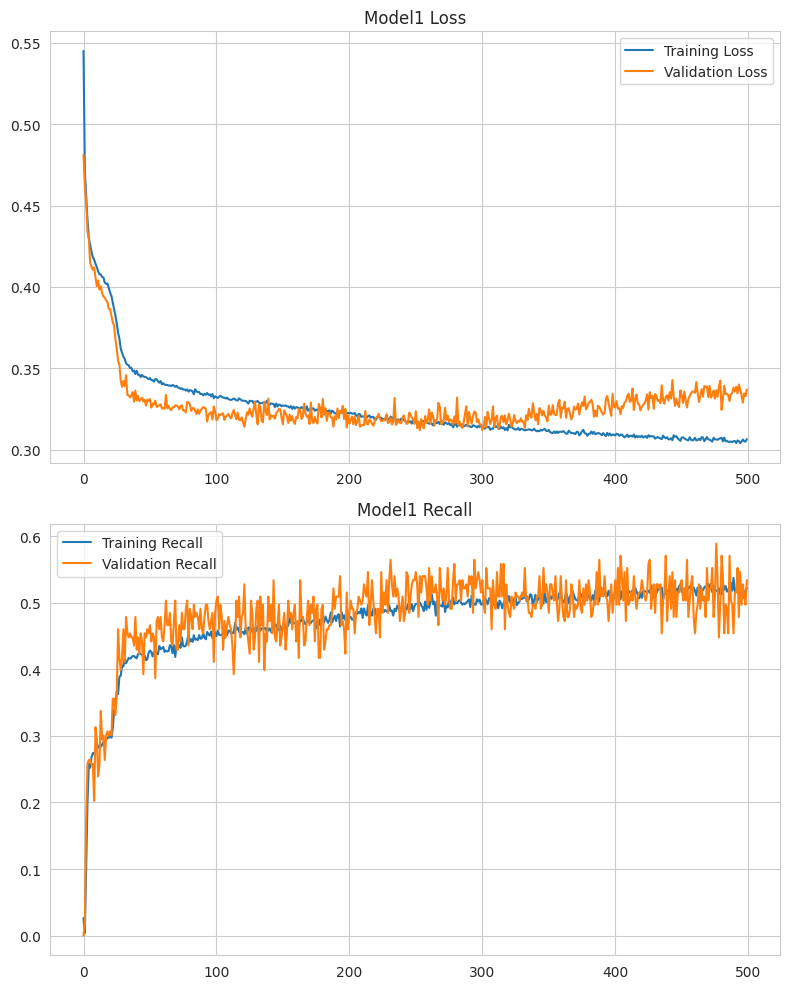

In [393]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model1 Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["recall"], label="Training Recall")
axes[1].plot(loss_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model1 Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [394]:
model1.evaluate(X_test_scaled, y_test, verbose=0)

[0.3602868616580963, 0.47911548614501953]

In [395]:
loss, recall = model1.evaluate(X_test_scaled, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.3602868616580963
recall:  0.47911548614501953


In [396]:
y_pred = (model1.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1508   85]
 [ 212  195]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.48      0.57       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



63/63 [==============================] - 0s 2ms/step


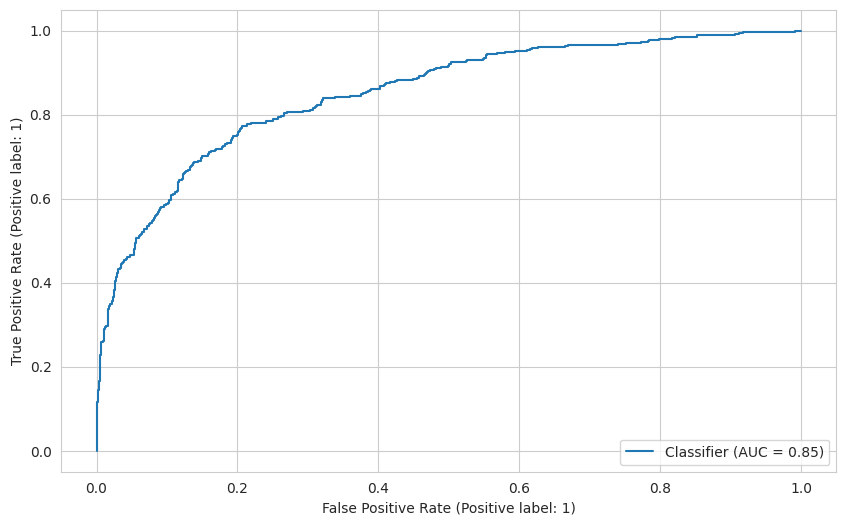

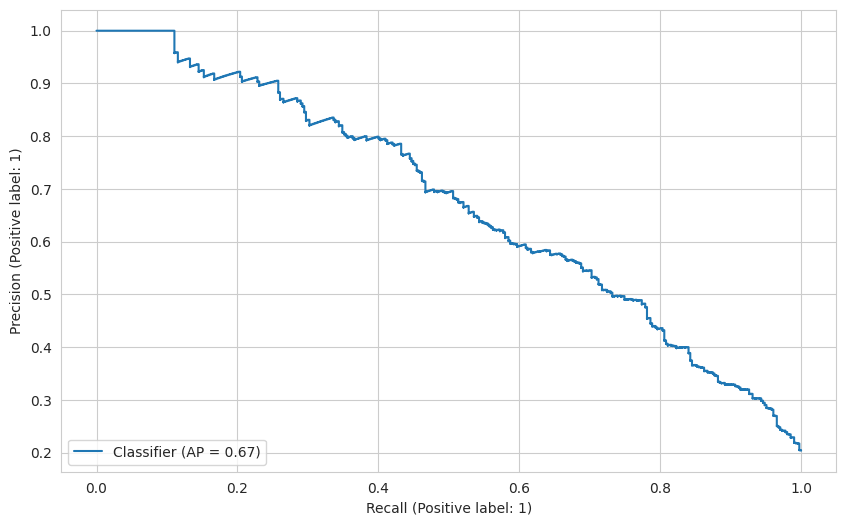

In [397]:
y_pred_proba = model1.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [398]:
y_pred = model1.predict(X_test_scaled) > 0.5
model1_AP = average_precision_score(y_test, y_pred)
model1_precision = precision_score(y_test, y_pred)
model1_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 2ms/step


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [399]:
from sklearn.utils import class_weight

In [400]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

In [401]:
class_weights

array([0.62794349, 2.45398773])

In [402]:
class_weights_dict = dict(enumerate(class_weights))

In [403]:
model2 = Sequential()

model2.add(Dense(15, activation="relu", input_dim=X_train_scaled.shape[1]))

model2.add(Dense(10, activation="relu"))

model2.add(Dense(6, activation="relu"))

model2.add(Dense(4, activation="relu"))

model2.add(Dense(1, activation="sigmoid"))

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [404]:
model2.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_203 (Dense)           (None, 15)                210       
                                                                 
 dense_204 (Dense)           (None, 10)                160       
                                                                 
 dense_205 (Dense)           (None, 6)                 66        
                                                                 
 dense_206 (Dense)           (None, 4)                 28        
                                                                 
 dense_207 (Dense)           (None, 1)                 5         
                                                                 
Total params: 469 (1.83 KB)
Trainable params: 469 (1.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [405]:
model2.fit(x=X_train_scaled,
          y=y_train,
          validation_data=(X_val_scaled, y_val),
          batch_size=32,
          epochs=500,
          verbose=1,
          class_weight=class_weights_dict)

Epoch 1/500
225/225 [==============================] - 2s 4ms/step - loss: 0.6798 - recall: 0.3354 - val_loss: 0.6051 - val_recall: 0.4540
Epoch 2/500
225/225 [==============================] - 1s 4ms/step - loss: 0.6571 - recall: 0.5767 - val_loss: 0.6158 - val_recall: 0.6442
Epoch 3/500
225/225 [==============================] - 1s 4ms/step - loss: 0.6435 - recall: 0.6537 - val_loss: 0.5875 - val_recall: 0.6074
Epoch 4/500
225/225 [==============================] - 1s 4ms/step - loss: 0.6329 - recall: 0.6585 - val_loss: 0.5740 - val_recall: 0.6319
Epoch 5/500
225/225 [==============================] - 1s 4ms/step - loss: 0.6221 - recall: 0.6823 - val_loss: 0.5854 - val_recall: 0.6687
Epoch 6/500
225/225 [==============================] - 1s 4ms/step - loss: 0.6104 - recall: 0.6892 - val_loss: 0.5333 - val_recall: 0.6135
Epoch 7/500
225/225 [==============================] - 1s 5ms/step - loss: 0.5975 - recall: 0.7048 - val_loss: 0.5134 - val_recall: 0.6503
Epoch 8/500
225/225 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [406]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.680,0.335,0.605,0.454
1,0.657,0.577,0.616,0.644
2,0.643,0.654,0.587,0.607
3,0.633,0.658,0.574,0.632
4,0.622,0.682,0.585,0.669


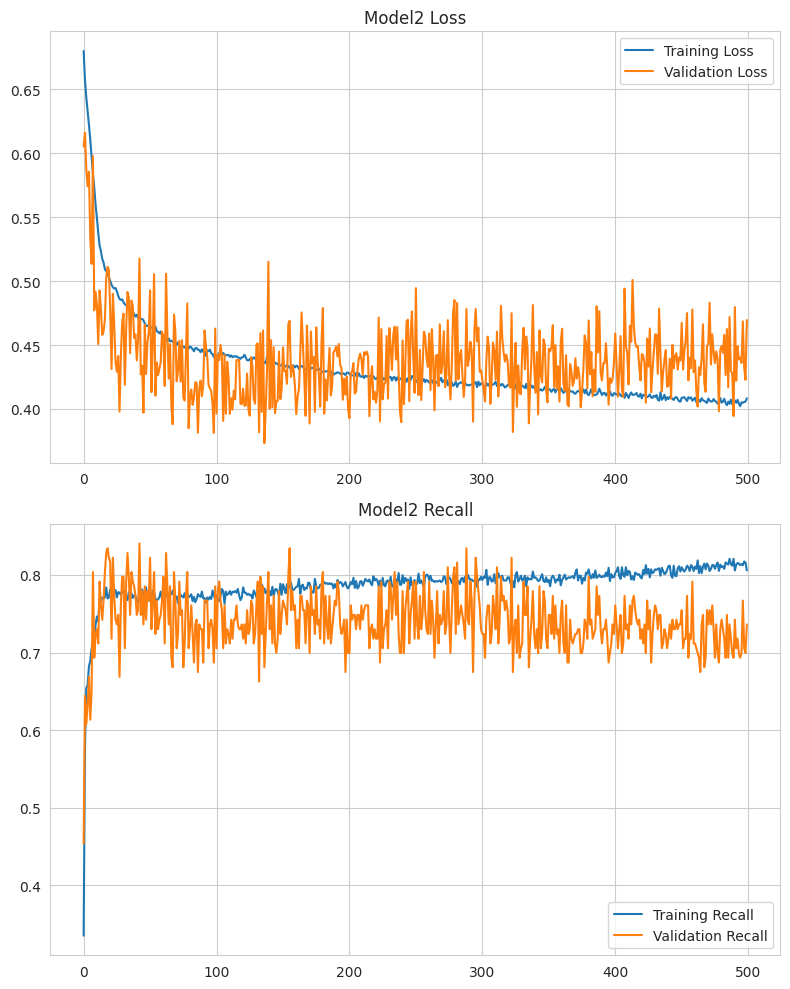

In [407]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model2 Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["recall"], label="Training Recall")
axes[1].plot(loss_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model2 Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [408]:
loss, accuracy = model2.evaluate(X_test_scaled, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.499264657497406
recall:  0.47911548614501953


In [409]:
y_pred = (model2.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1194  399]
 [  86  321]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1593
           1       0.45      0.79      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



63/63 [==============================] - 0s 2ms/step


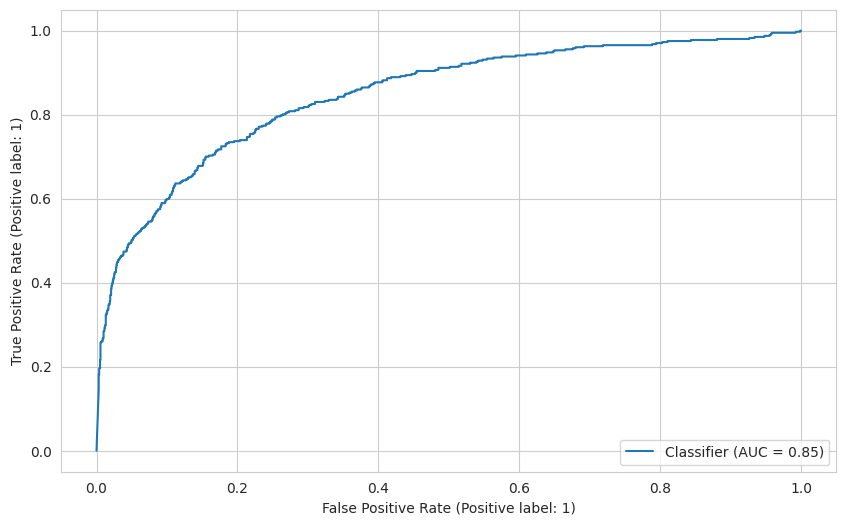

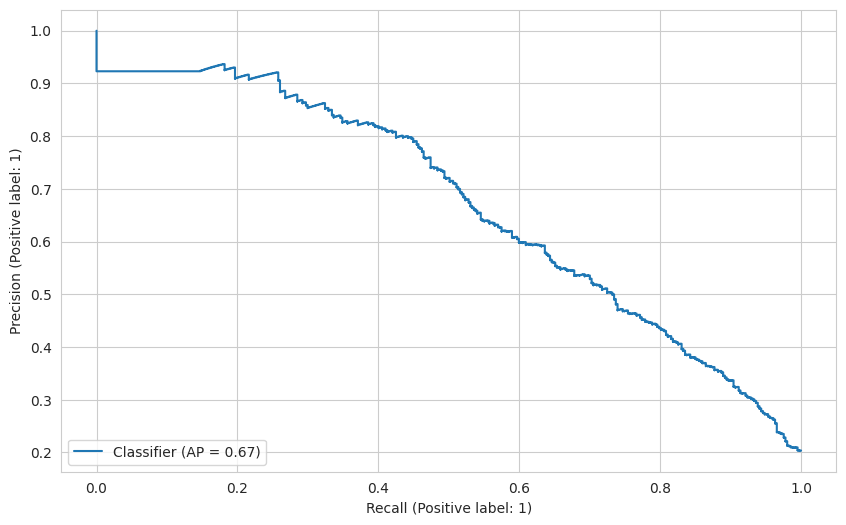

In [410]:
y_pred_proba = model2.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [411]:
y_pred = model2.predict(X_test_scaled) > 0.5
model2_AP = average_precision_score(y_test, y_pred)
model2_precision = precision_score(y_test, y_pred)
model2_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 2ms/step


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [412]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.003

In [413]:
model3 = Sequential()

model3.add(Dense(15, activation="relu", input_dim=X_train_scaled.shape[1]))

model3.add(Dense(10, activation="relu"))

model3.add(Dense(6, activation="relu"))

model3.add(Dense(4, activation="relu"))

model3.add(Dense(1, activation="sigmoid"))

opt=Adam(learning_rate = learning_rate)
model3.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [414]:
model3.fit(
    x=X_train_scaled,
    y=y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=500,
    verbose=1,
    class_weight=class_weights_dict)

Epoch 1/500
225/225 [==============================] - 2s 5ms/step - loss: 0.6625 - recall: 0.5181 - val_loss: 0.6088 - val_recall: 0.6871
Epoch 2/500
225/225 [==============================] - 1s 3ms/step - loss: 0.6269 - recall: 0.6776 - val_loss: 0.5507 - val_recall: 0.6810
Epoch 3/500
225/225 [==============================] - 1s 3ms/step - loss: 0.5983 - recall: 0.7001 - val_loss: 0.5551 - val_recall: 0.7914
Epoch 4/500
225/225 [==============================] - 1s 4ms/step - loss: 0.5663 - recall: 0.7287 - val_loss: 0.5749 - val_recall: 0.8589
Epoch 5/500
225/225 [==============================] - 1s 5ms/step - loss: 0.5360 - recall: 0.7614 - val_loss: 0.5675 - val_recall: 0.8773
Epoch 6/500
225/225 [==============================] - 1s 6ms/step - loss: 0.5285 - recall: 0.7648 - val_loss: 0.4609 - val_recall: 0.7791
Epoch 7/500
225/225 [==============================] - 1s 6ms/step - loss: 0.5181 - recall: 0.7628 - val_loss: 0.4491 - val_recall: 0.7669
Epoch 8/500
225/225 [======

In [415]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.663,0.518,0.609,0.687
1,0.627,0.678,0.551,0.681
2,0.598,0.700,0.555,0.791
3,0.566,0.729,0.575,0.859
4,0.536,0.761,0.567,0.877


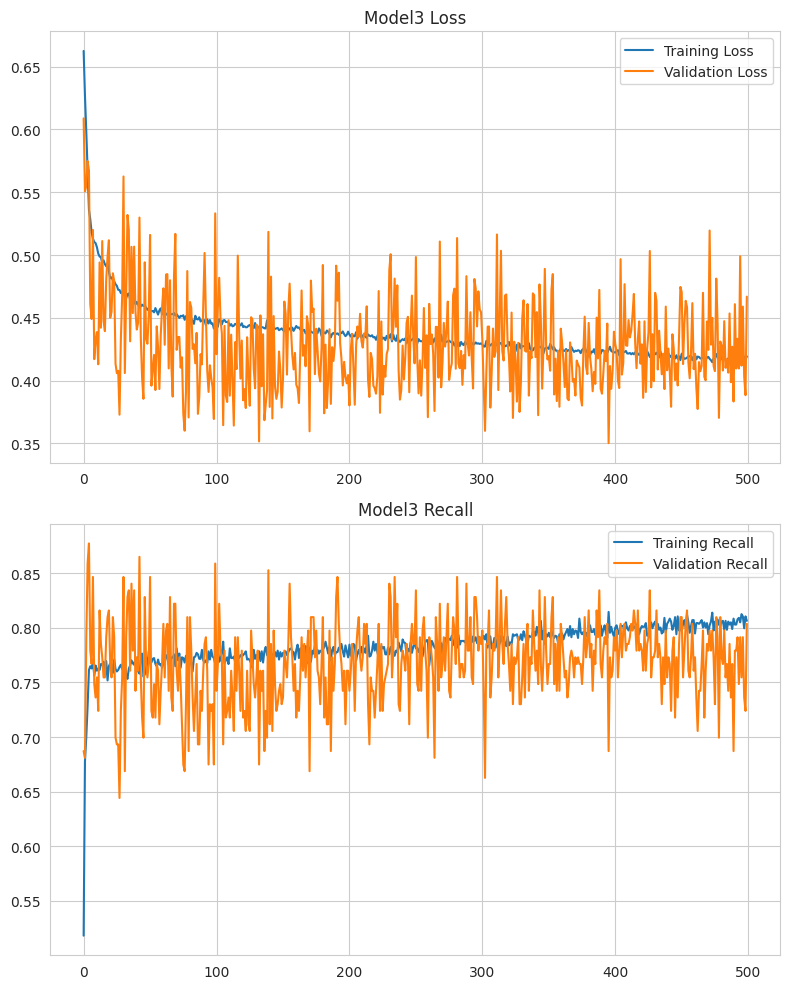

In [416]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model3 Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["recall"], label="Training Recall")
axes[1].plot(loss_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model3 Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [417]:
loss, accuracy = model3.evaluate(X_test_scaled, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5072798728942871
recall:  0.47911548614501953


In [418]:
y_pred = (model3.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1176  417]
 [  84  323]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1593
           1       0.44      0.79      0.56       407

    accuracy                           0.75      2000
   macro avg       0.68      0.77      0.69      2000
weighted avg       0.83      0.75      0.77      2000



63/63 [==============================] - 0s 2ms/step


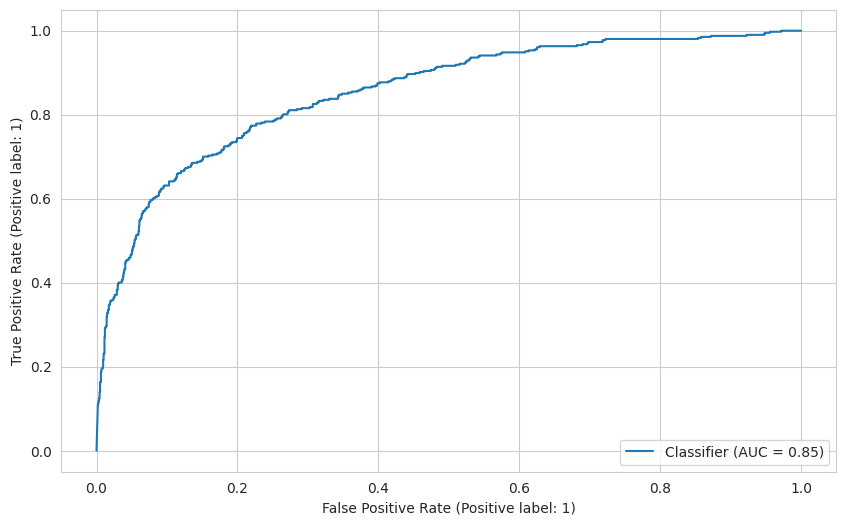

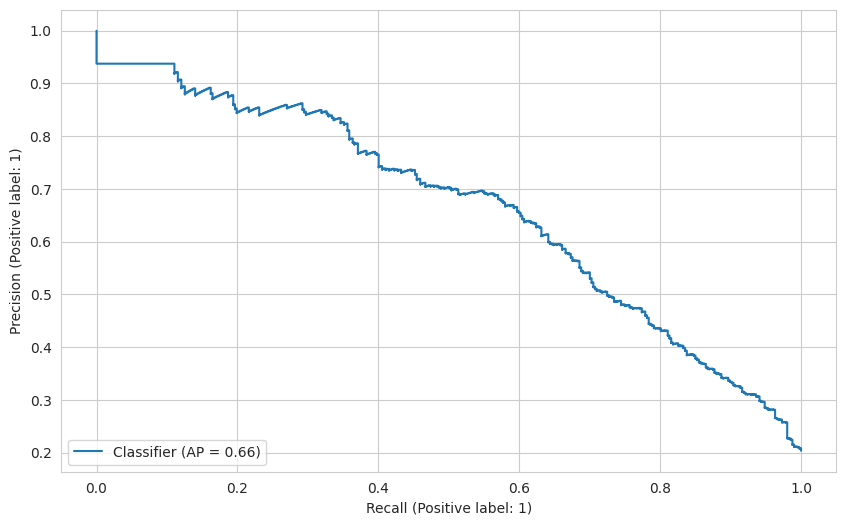

In [419]:
y_pred_proba = model3.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [420]:
y_pred = model3.predict(X_test_scaled) > 0.5
model3_AP = average_precision_score(y_test, y_pred)
model3_precision = precision_score(y_test, y_pred)
model3_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 2ms/step


### Add Dropout Layer

In [421]:
from tensorflow.keras.layers import Dropout

learning_rate = 0.003

In [422]:
model4 = Sequential()

model4.add(Dense(15, activation="relu", input_dim=X_train_scaled.shape[1]))
model4.add(Dropout(0.5))

model4.add(Dense(10, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(6, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(4, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(1, activation="sigmoid"))

opt=Adam(learning_rate = learning_rate)
model4.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [423]:
model4.fit(
    x=X_train_scaled,
    y=y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=500,
    verbose=1,
    class_weight=class_weights_dict)

Epoch 1/500
225/225 [==============================] - 2s 4ms/step - loss: 0.6935 - recall: 0.8200 - val_loss: 0.7045 - val_recall: 1.0000
Epoch 2/500
225/225 [==============================] - 1s 5ms/step - loss: 0.6916 - recall: 0.8882 - val_loss: 0.7006 - val_recall: 0.9693
Epoch 3/500
225/225 [==============================] - 1s 6ms/step - loss: 0.6886 - recall: 0.8684 - val_loss: 0.7014 - val_recall: 0.9202
Epoch 4/500
225/225 [==============================] - 1s 6ms/step - loss: 0.6884 - recall: 0.8630 - val_loss: 0.7027 - val_recall: 0.9264
Epoch 5/500
225/225 [==============================] - 1s 3ms/step - loss: 0.6870 - recall: 0.8698 - val_loss: 0.7064 - val_recall: 0.9939
Epoch 6/500
225/225 [==============================] - 1s 3ms/step - loss: 0.6879 - recall: 0.8807 - val_loss: 0.6815 - val_recall: 0.7178
Epoch 7/500
225/225 [==============================] - 1s 3ms/step - loss: 0.6829 - recall: 0.8534 - val_loss: 0.6620 - val_recall: 0.5460
Epoch 8/500
225/225 [======

In [424]:
loss_df = pd.DataFrame(model4.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.694,0.820,0.705,1.000
1,0.692,0.888,0.701,0.969
2,0.689,0.868,0.701,0.920
3,0.688,0.863,0.703,0.926
4,0.687,0.870,0.706,0.994


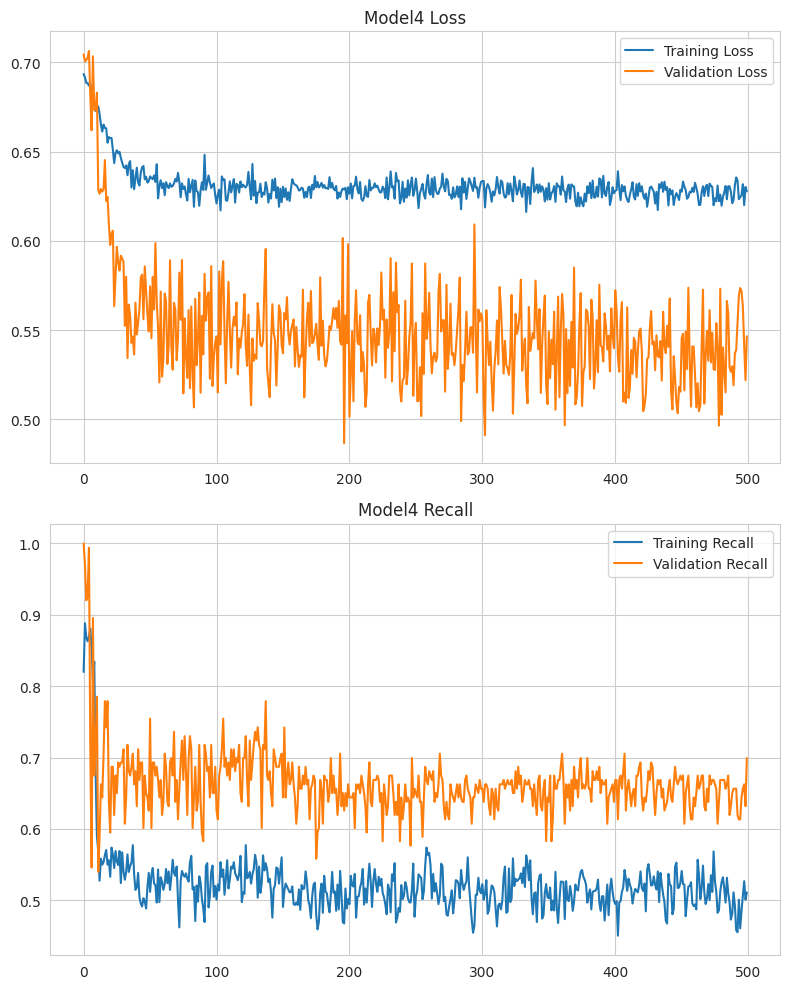

In [425]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model4 Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["recall"], label="Training Recall")
axes[1].plot(loss_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model4 Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [426]:
loss, accuracy = model4.evaluate(X_test_scaled, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5586587190628052
recall:  0.47911548614501953


In [427]:
y_pred = (model4.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1261  332]
 [ 119  288]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1593
           1       0.46      0.71      0.56       407

    accuracy                           0.77      2000
   macro avg       0.69      0.75      0.70      2000
weighted avg       0.82      0.77      0.79      2000



63/63 [==============================] - 0s 1ms/step


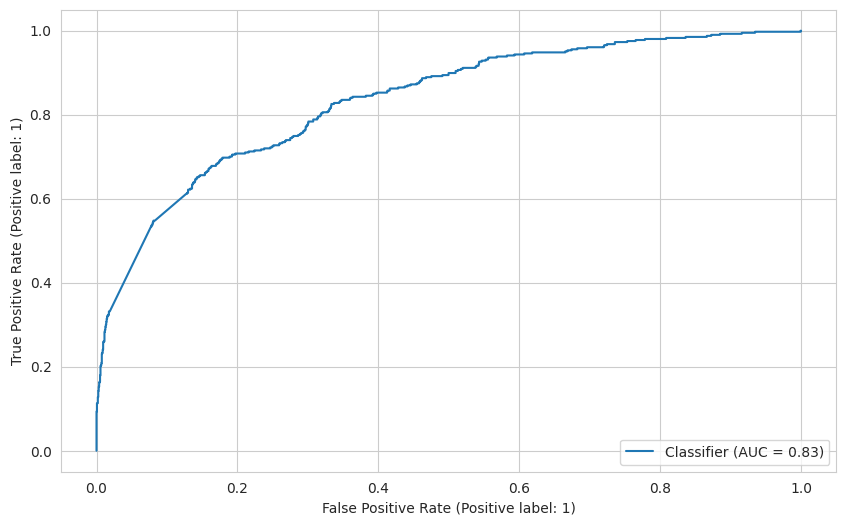

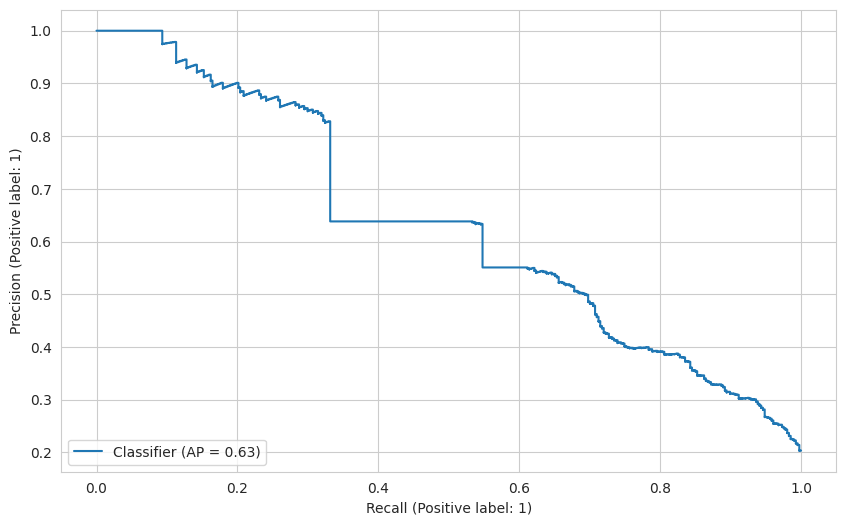

In [428]:
y_pred_proba = model4.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [429]:
y_pred = model4.predict(X_test_scaled) > 0.5
model4_AP = average_precision_score(y_test, y_pred)
model4_precision = precision_score(y_test, y_pred)
model4_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 1ms/step


### Add Early Stop

#### Monitor the "val_loss" as metric

In [430]:
from tensorflow.keras.callbacks import EarlyStopping

learning_rate = 0.003

In [431]:
model5 = Sequential()

model5.add(Dense(15, activation="relu", input_dim=X_train_scaled.shape[1]))

model5.add(Dense(10, activation="relu"))

model5.add(Dense(6, activation="relu"))

model5.add(Dense(4, activation="relu"))

model5.add(Dense(1, activation="sigmoid"))

opt=Adam(learning_rate = learning_rate)
model5.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [432]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [433]:
model5.fit(
    x=X_train_scaled,
    y=y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=500,
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[early_stop])

Epoch 1/500
225/225 [==============================] - 2s 4ms/step - loss: 0.6541 - recall: 0.6939 - val_loss: 0.7207 - val_recall: 0.7607
Epoch 2/500
225/225 [==============================] - 1s 4ms/step - loss: 0.6054 - recall: 0.6653 - val_loss: 0.5372 - val_recall: 0.6626
Epoch 3/500
225/225 [==============================] - 1s 5ms/step - loss: 0.5769 - recall: 0.6946 - val_loss: 0.5511 - val_recall: 0.7546
Epoch 4/500
225/225 [==============================] - 1s 5ms/step - loss: 0.5549 - recall: 0.7192 - val_loss: 0.6415 - val_recall: 0.8589
Epoch 5/500
225/225 [==============================] - 1s 6ms/step - loss: 0.5307 - recall: 0.7403 - val_loss: 0.5603 - val_recall: 0.8405
Epoch 6/500
225/225 [==============================] - 1s 3ms/step - loss: 0.5227 - recall: 0.7444 - val_loss: 0.5018 - val_recall: 0.7975
Epoch 7/500
225/225 [==============================] - 1s 3ms/step - loss: 0.5054 - recall: 0.7471 - val_loss: 0.4725 - val_recall: 0.8098
Epoch 8/500
225/225 [======

In [434]:
loss_df = pd.DataFrame(model5.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.654,0.694,0.721,0.761
1,0.605,0.665,0.537,0.663
2,0.577,0.695,0.551,0.755
3,0.555,0.719,0.641,0.859
4,0.531,0.740,0.560,0.840


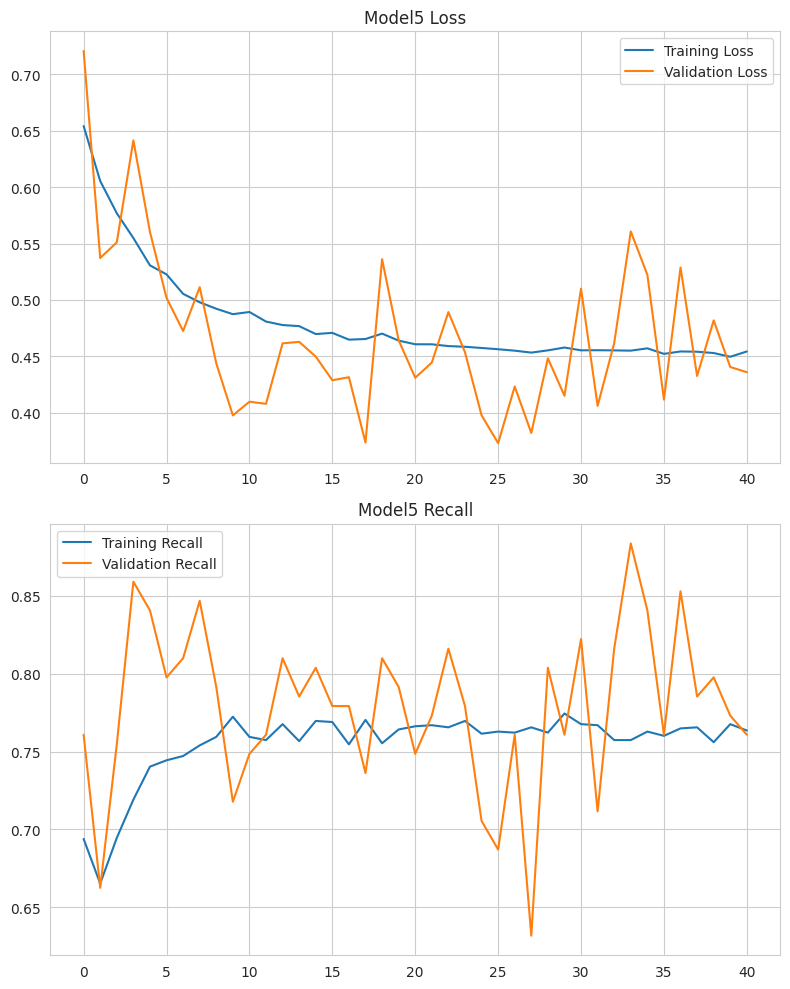

In [435]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model5 Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["recall"], label="Training Recall")
axes[1].plot(loss_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model5 Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [436]:
loss, accuracy = model5.evaluate(X_test_scaled, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.3946828544139862
recall:  0.47911548614501953


In [437]:
y_pred = (model5.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1375  218]
 [ 132  275]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1593
           1       0.56      0.68      0.61       407

    accuracy                           0.82      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000



63/63 [==============================] - 0s 2ms/step


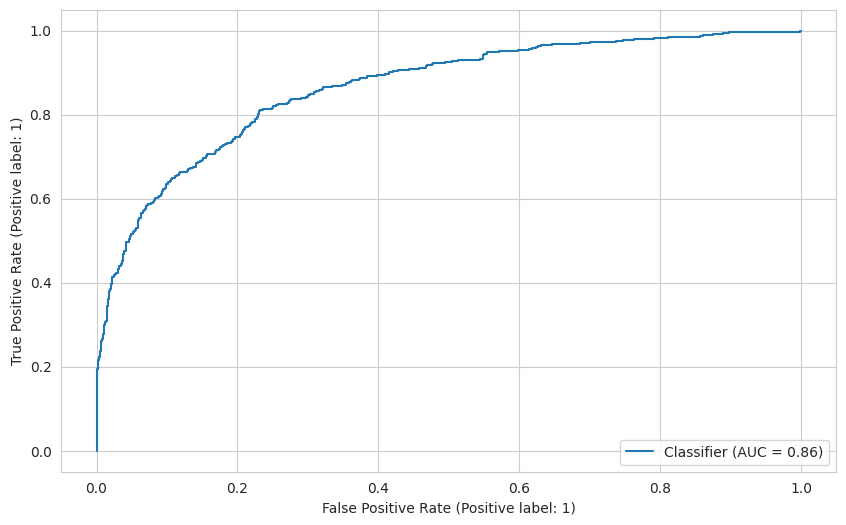

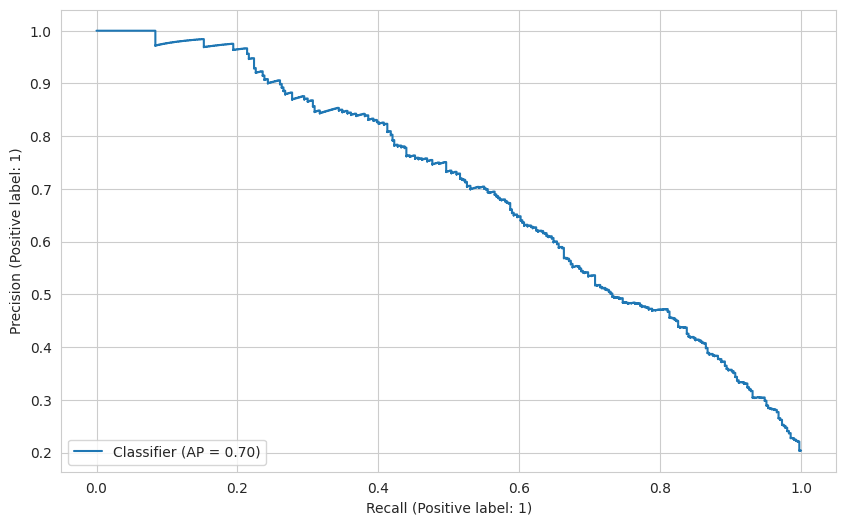

In [438]:
y_pred_proba = model5.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [439]:
y_pred = model5.predict(X_test_scaled) > 0.5
model5_AP = average_precision_score(y_test, y_pred)
model5_precision = precision_score(y_test, y_pred)
model5_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 2ms/step


#### Monitor the "val_recall" as metric

In [440]:
learning_rate = 0.003

In [441]:
model6 = Sequential()

model6.add(Dense(15, activation="relu", input_dim=X_train_scaled.shape[1]))

model6.add(Dense(10, activation="relu"))

model6.add(Dense(6, activation="relu"))

model6.add(Dense(4, activation="relu"))

model6.add(Dense(1, activation="sigmoid"))

opt=Adam(learning_rate = learning_rate)
model6.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [442]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience=15, restore_best_weights=True)

In [443]:
model6.fit(
    x=X_train_scaled,
    y=y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=500,
    verbose=1,
    class_weight=class_weights_dict,
    callbacks=[early_stop])

Epoch 1/500
225/225 [==============================] - 2s 4ms/step - loss: 0.6501 - recall: 0.5781 - val_loss: 0.7053 - val_recall: 0.7239
Epoch 2/500
225/225 [==============================] - 1s 3ms/step - loss: 0.6135 - recall: 0.6673 - val_loss: 0.5606 - val_recall: 0.6564
Epoch 3/500
225/225 [==============================] - 1s 3ms/step - loss: 0.5910 - recall: 0.6796 - val_loss: 0.5613 - val_recall: 0.7055
Epoch 4/500
225/225 [==============================] - 1s 3ms/step - loss: 0.5754 - recall: 0.6987 - val_loss: 0.6860 - val_recall: 0.8528
Epoch 5/500
225/225 [==============================] - 1s 3ms/step - loss: 0.5554 - recall: 0.7055 - val_loss: 0.5891 - val_recall: 0.8098
Epoch 6/500
225/225 [==============================] - 1s 3ms/step - loss: 0.5384 - recall: 0.7198 - val_loss: 0.5691 - val_recall: 0.8221
Epoch 7/500
225/225 [==============================] - 1s 3ms/step - loss: 0.5131 - recall: 0.7219 - val_loss: 0.4411 - val_recall: 0.7546
Epoch 8/500
225/225 [======

In [444]:
loss_df = pd.DataFrame(model6.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.650,0.578,0.705,0.724
1,0.613,0.667,0.561,0.656
2,0.591,0.680,0.561,0.706
3,0.575,0.699,0.686,0.853
4,0.555,0.706,0.589,0.810


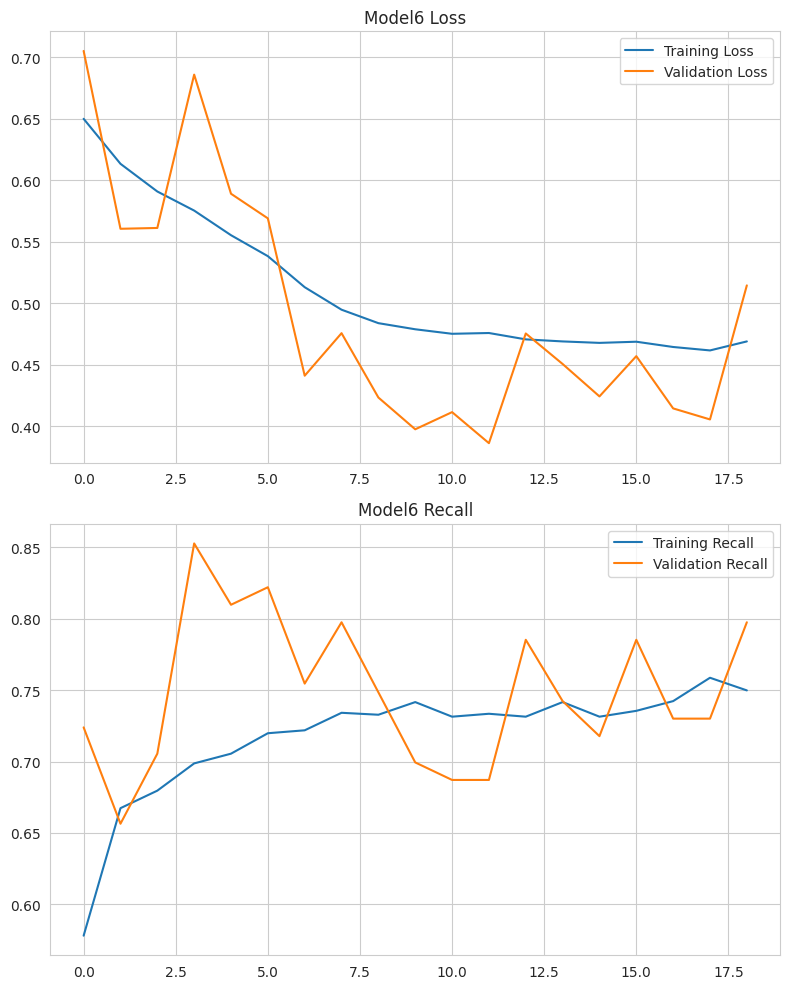

In [445]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model6 Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["recall"], label="Training Recall")
axes[1].plot(loss_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model6 Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [446]:
loss, accuracy = model6.evaluate(X_test_scaled, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.7143093943595886
recall:  0.47911548614501953


In [447]:
y_pred = (model6.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[822 771]
 [ 46 361]]
              precision    recall  f1-score   support

           0       0.95      0.52      0.67      1593
           1       0.32      0.89      0.47       407

    accuracy                           0.59      2000
   macro avg       0.63      0.70      0.57      2000
weighted avg       0.82      0.59      0.63      2000



63/63 [==============================] - 0s 2ms/step


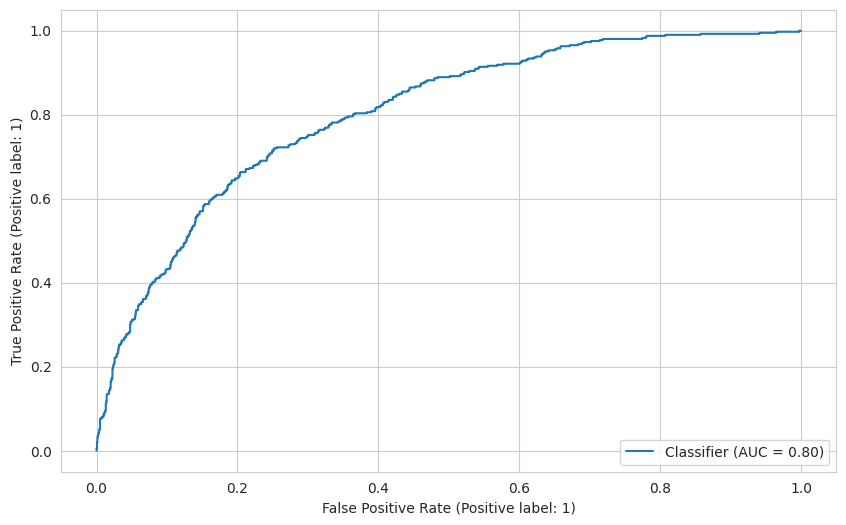

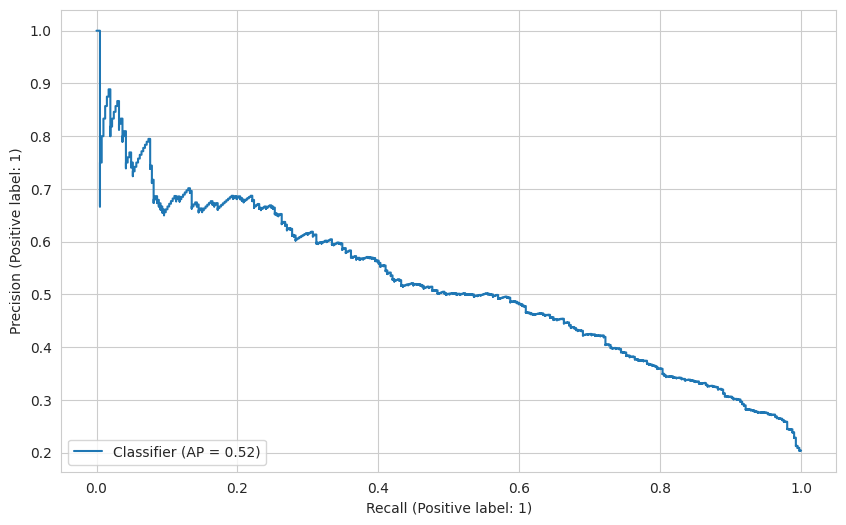

In [448]:
y_pred_proba = model6.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [449]:
y_pred = model6.predict(X_test_scaled) > 0.5
model6_AP = average_precision_score(y_test, y_pred)
model6_precision = precision_score(y_test, y_pred)
model6_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 2ms/step


## Optuna

In [450]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [451]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [452]:
trial_metric = "Recall"
batch_size = 32


def create_model(trial): # the part where the metric ranges in the compile part of the model are determined and the model is built
    # Some hyperparameters we want to optimize #
    n_units1 = trial.suggest_int("n_units1", 2, 128) # number of neurons
    n_units2 = trial.suggest_int("n_units2", 2, 128)
    n_units3 = trial.suggest_int("n_units3", 2, 128)
    n_units4 = trial.suggest_int("n_units4", 2, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train_scaled.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu")) # hidden layer
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(n_units4, activation="relu"))
    model.add(Dense(1, activation="sigmoid")) # output.
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model

In [453]:
def objective(trial): # contains fit
    model = create_model(trial) # called the created model.
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # class_weight
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train_scaled,
        y_train,
        validation_data=(X_val_scaled, y_val),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
    return score

In [454]:
# Create an Optuna study to maximize the objective function
study = optuna.create_study(direction="maximize")

# Run the optimization for 25 trials
study.optimize(objective, n_trials=10)

# Get the best hyperparameters found by Optuna
best_params = study.best_params
best_params

[I 2024-07-21 17:37:40,084] A new study created in memory with name: no-name-59e16a33-76f2-4280-a817-1e2cbe6facf9


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2024-07-21 17:37:59,766] Trial 0 finished with value: 0.547911524772644 and parameters: {'n_units1': 55, 'n_units2': 67, 'n_units3': 100, 'n_units4': 88, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.005297458499991235, 'w0': 0.7790890055962182, 'w1': 1.0302447670678807}. Best is trial 0 with value: 0.547911524772644.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2024-07-21 17:38:09,471] Trial 1 finished with value: 1.0 and parameters: {'n_units1': 61, 'n_units2': 108, 'n_units3': 56, 'n_units4': 30, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 5.0209118304736904e-05, 'w0': 0.030338729319177082, 'w1': 0.6288703851648914}. Best is trial 1 with value: 1.0.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2024-07-21 17:38:27,081] Trial 2 finished with value: 0.03194103017449379 and parameters: {'n_units1': 94, 'n_units2': 15, 'n_units3': 53, 'n_units4': 91, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.01700488966791033, 'w0': 0.7751594715609814, 'w1': 0.02773491486321307}. Best is trial 1 with value: 1.0.


Restoring model weights from the end of the best epoch: 30.
Epoch 45: early stopping


[I 2024-07-21 17:38:53,799] Trial 3 finished with value: 0.5135135054588318 and parameters: {'n_units1': 57, 'n_units2': 108, 'n_units3': 86, 'n_units4': 45, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.01880056607221414, 'w0': 0.041742534399213715, 'w1': 0.042447569317270256}. Best is trial 1 with value: 1.0.
[I 2024-07-21 17:39:51,476] Trial 4 finished with value: 0.5282555222511292 and parameters: {'n_units1': 70, 'n_units2': 51, 'n_units3': 52, 'n_units4': 30, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 3.852357732025295e-05, 'w0': 1.8462479152682725, 'w1': 2.373398533467444}. Best is trial 1 with value: 1.0.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2024-07-21 17:40:13,628] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 37, 'n_units2': 55, 'n_units3': 125, 'n_units4': 82, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.10790787158611151, 'w0': 0.027736559820299857, 'w1': 0.010199229745407176}. Best is trial 1 with value: 1.0.


Restoring model weights from the end of the best epoch: 30.
Epoch 45: early stopping


[I 2024-07-21 17:40:42,364] Trial 6 finished with value: 0.3882063925266266 and parameters: {'n_units1': 81, 'n_units2': 83, 'n_units3': 70, 'n_units4': 117, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.024340591555703655, 'w0': 0.11496535133725563, 'w1': 0.09036636552026828}. Best is trial 1 with value: 1.0.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2024-07-21 17:40:58,334] Trial 7 finished with value: 0.3562653660774231 and parameters: {'n_units1': 21, 'n_units2': 26, 'n_units3': 58, 'n_units4': 67, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0067552978919839125, 'w0': 0.344780152182776, 'w1': 0.2379992652462724}. Best is trial 1 with value: 1.0.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2024-07-21 17:41:15,377] Trial 8 finished with value: 0.9950860142707825 and parameters: {'n_units1': 117, 'n_units2': 34, 'n_units3': 86, 'n_units4': 106, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0007316902950020408, 'w0': 0.014779041530371946, 'w1': 1.7581085516478707}. Best is trial 1 with value: 1.0.


Restoring model weights from the end of the best epoch: 43.
Epoch 58: early stopping


[I 2024-07-21 17:41:58,247] Trial 9 finished with value: 0.10319410264492035 and parameters: {'n_units1': 84, 'n_units2': 36, 'n_units3': 95, 'n_units4': 29, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.003220281149520671, 'w0': 0.8272753619201594, 'w1': 0.015748325310477877}. Best is trial 1 with value: 1.0.


{'n_units1': 61,
 'n_units2': 108,
 'n_units3': 56,
 'n_units4': 30,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 5.0209118304736904e-05,
 'w0': 0.030338729319177082,
 'w1': 0.6288703851648914}

In [455]:
# build model with optuna parameters
unit1, unit2, unit3, unit4, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["n_units4"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model7 = Sequential()
model7.add(Dense(unit1, activation="relu", input_dim=X_train_scaled.shape[1]))
model7.add(Dense(unit2, activation="relu"))
model7.add(Dense(unit3, activation="relu"))
model7.add(Dense(unit4, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))

opt = optimizer(learning_rate=lr)
model7.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model7.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    batch_size=32,
    epochs=500,
    callbacks=[early_stop],
    class_weight={0: w0, 1: w1},
    verbose=1,
)

Epoch 1/500
225/225 [==============================] - 3s 12ms/step - loss: 0.0976 - recall: 0.7921 - val_loss: 0.8636 - val_recall: 1.0000
Epoch 2/500
225/225 [==============================] - 1s 3ms/step - loss: 0.0756 - recall: 1.0000 - val_loss: 1.1891 - val_recall: 1.0000
Epoch 3/500
225/225 [==============================] - 1s 3ms/step - loss: 0.0664 - recall: 1.0000 - val_loss: 1.4162 - val_recall: 1.0000
Epoch 4/500
225/225 [==============================] - 1s 3ms/step - loss: 0.0648 - recall: 1.0000 - val_loss: 1.4495 - val_recall: 1.0000
Epoch 5/500
225/225 [==============================] - 1s 3ms/step - loss: 0.0639 - recall: 1.0000 - val_loss: 1.4256 - val_recall: 1.0000
Epoch 6/500
225/225 [==============================] - 1s 3ms/step - loss: 0.0633 - recall: 1.0000 - val_loss: 1.4138 - val_recall: 1.0000
Epoch 7/500
225/225 [==============================] - 1s 3ms/step - loss: 0.0627 - recall: 1.0000 - val_loss: 1.3880 - val_recall: 1.0000
Epoch 8/500
225/225 [=====

In [456]:
model7.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_278 (Dense)           (None, 61)                854       
                                                                 
 dense_279 (Dense)           (None, 108)               6696      
                                                                 
 dense_280 (Dense)           (None, 56)                6104      
                                                                 
 dense_281 (Dense)           (None, 30)                1710      
                                                                 
 dense_282 (Dense)           (None, 1)                 31        
                                                                 
Total params: 15395 (60.14 KB)
Trainable params: 15395 (60.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [457]:
loss_df = pd.DataFrame(model7.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.098,0.792,0.864,1.000
1,0.076,1.000,1.189,1.000
2,0.066,1.000,1.416,1.000
3,0.065,1.000,1.449,1.000
4,0.064,1.000,1.426,1.000


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

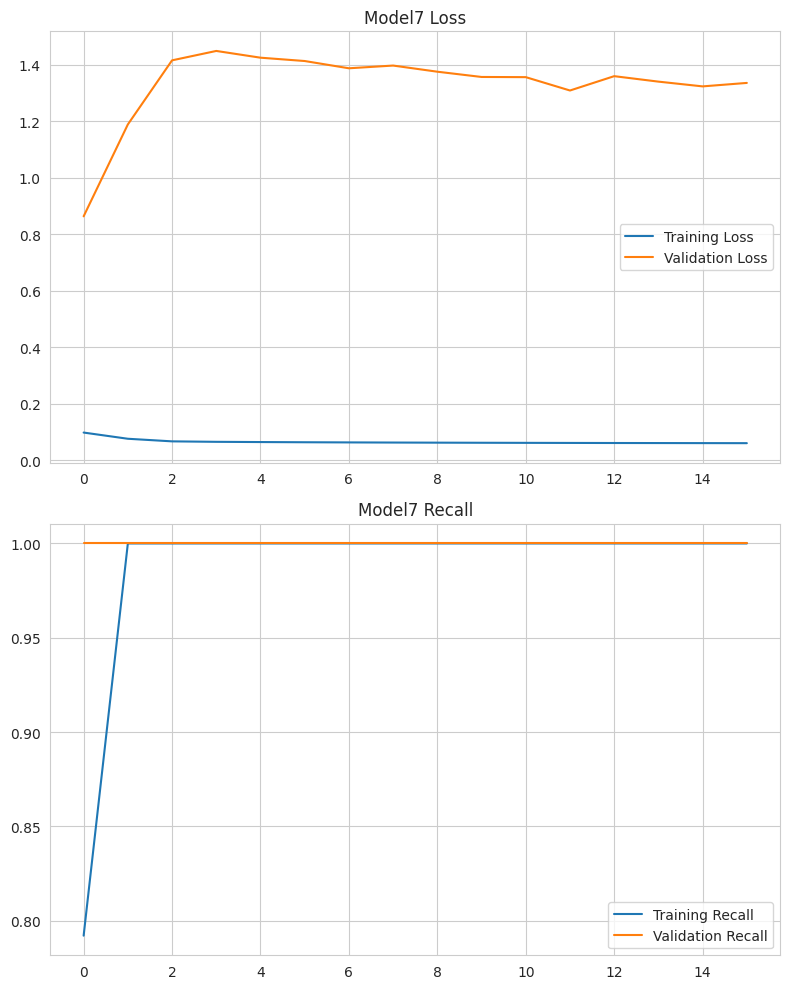

In [458]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model7 Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["recall"], label="Training Recall")
axes[1].plot(loss_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model7 Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [459]:
loss, accuracy = model7.evaluate(X_test_scaled, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.8604692816734314
recall:  0.47911548614501953


In [460]:
y_pred = (model7.predict(X_test_scaled) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[   0 1593]
 [   0  407]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



63/63 [==============================] - 0s 3ms/step


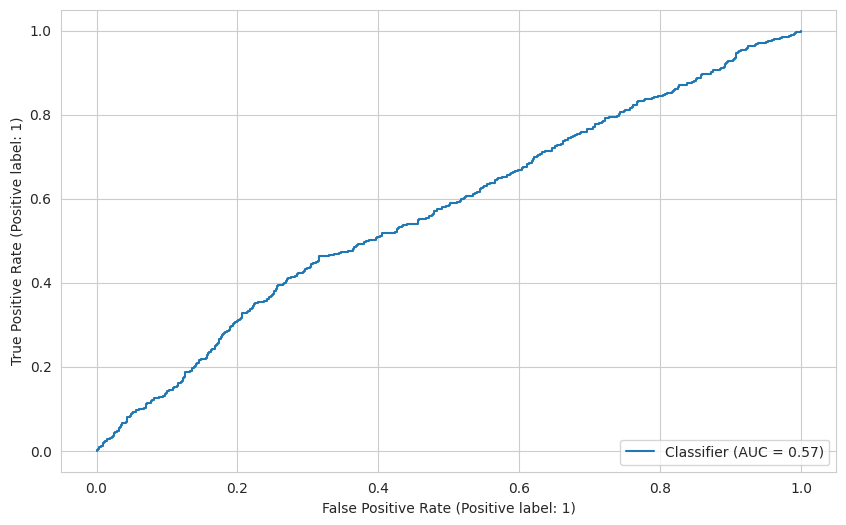

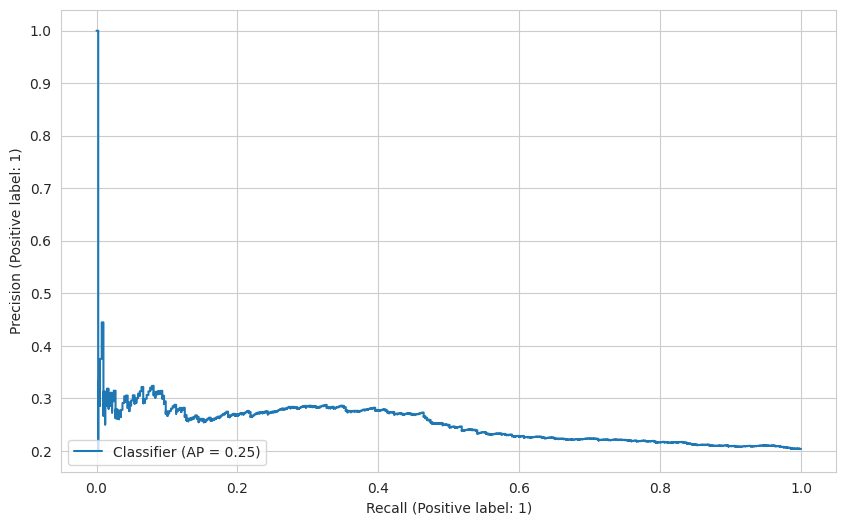

In [461]:
y_pred_proba = model7.predict(X_test_scaled)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [462]:
y_pred = model7.predict(X_test_scaled) > 0.5
model7_AP = average_precision_score(y_test, y_pred)
model7_precision = precision_score(y_test, y_pred)
model7_recall = recall_score(y_test, y_pred)

63/63 [==============================] - 0s 2ms/step


# Compare of Models

In [463]:
compare= pd.DataFrame({"Methods": ["Non Class-weight", "Class-weight",  "Class-weight,learning_rate",
                                 "Class-weight,learning_rate,dropout","Class-weight,Learning_rate,Earlystop-val_loss",
                                   "Class-weight,Learning_rate,Earlystop-val_recall","Optuna"],
                       "Precision": [model1_precision, model2_precision, model3_precision, model4_precision,
                                     model5_precision, model6_precision, model7_precision],
                       "Recall": [model1_recall, model2_recall, model3_recall, model4_recall,
                                  model5_recall, model6_recall, model7_recall],
                       "AP": [model1_AP, model2_AP, model3_AP, model4_AP,
                              model5_AP,model6_AP,model7_AP]})

compare

,Methods,Precision,Recall,AP
0,Non Class-weight,0.696,0.479,0.440
1,Class-weight,0.446,0.789,0.395
2,"Class-weight,learning_rate",0.436,0.794,0.388
3,"Class-weight,learning_rate,dropout",0.465,0.708,0.388
4,"Class-weight,Learning_rate,Earlystop-val_loss",0.558,0.676,0.443
5,"Class-weight,Learning_rate,Earlystop-val_recall",0.319,0.887,0.306
6,Optuna,0.203,1.000,0.203


# Final Model and Model Deployment

In [464]:
import pickle

pickle.dump(scaler, open("scaler_final", "wb"))

In [466]:
loss, accuracy = model6.evaluate(X_test_scaled, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.7143093943595886
recall:  0.47911548614501953


In [465]:
y_pred = model6.predict(X_test_scaled) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 1s 6ms/step
[[822 771]
 [ 46 361]]
              precision    recall  f1-score   support

           0       0.95      0.52      0.67      1593
           1       0.32      0.89      0.47       407

    accuracy                           0.59      2000
   macro avg       0.63      0.70      0.57      2000
weighted avg       0.82      0.59      0.63      2000



In [467]:
model6.save("final_model.h5")

# Loading Model and Scaler

In [468]:
from tensorflow.keras.models import load_model
import pickle

In [469]:
final_model = load_model("final_model.h5")
scaler_final = pickle.load(open("scaler_final", "rb"))

## Prediction

In [485]:
sample = df.drop("exited", axis=1).iloc[0:5, :]
sample

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580
2,502,France,Female,42,8,159660.800,3,1,0,113931.570
3,699,France,Female,39,1,0.000,2,0,0,93826.630
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100


In [486]:
sample = column_trans.transform(sample)
sample

,geography_France,geography_Germany,geography_Spain,gender_Female,gender_Male,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,1.000,0.000,0.000,1.000,0.000,619,42,2,0.000,1,1,1,101348.880
1,0.000,0.000,1.000,1.000,0.000,608,41,1,83807.860,1,0,1,112542.580
2,1.000,0.000,0.000,1.000,0.000,502,42,8,159660.800,3,1,0,113931.570
3,1.000,0.000,0.000,1.000,0.000,699,39,1,0.000,2,0,0,93826.630
4,0.000,0.000,1.000,1.000,0.000,850,43,2,125510.820,1,1,1,79084.100


In [487]:
sample = scaler_final.transform(sample)
sample

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489],
       [0.        , 0.        , 1.        , 1.        , 0.        ,
        0.516     , 0.31081081, 0.1       , 0.35156138, 0.        ,
        0.        , 1.        , 0.56270874],
       [1.        , 0.        , 0.        , 1.        , 0.        ,
        0.304     , 0.32432432, 0.8       , 0.66975307, 0.66666667,
        1.        , 0.        , 0.56965435],
       [1.        , 0.        , 0.        , 1.        , 0.        ,
        0.698     , 0.28378378, 0.1       , 0.        , 0.33333333,
        0.        , 0.        , 0.46912005],
       [0.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.33783784, 0.2       , 0.52649903, 0.        ,
        1.        , 1.        , 0.39540036]])

In [488]:
(final_model.predict(sample) > 0.5).astype("int32")

1/1 [==============================] - 0s 44ms/step


array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [489]:
df["exited"].iloc[0:5]

0    1
1    0
2    1
3    0
4    0
Name: exited, dtype: int64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___